# Beyond Pens, Paper and Ink: Evaluating Council Spending

## Table of Contents

1. Introduction 
    - Rochdale Borough Council 
    - The Purpose Of This Project
2. Data Processing 
    - Importing Data
    - Organising Data
    - Cleaning Data
3. Exploratory Data Analysis 
    - Summary Statistics
    - Expenditure Over Time 
    - Expenditure By Department 
    - Revenue By Department 
4. Outliers and Anomalies 
    - Anomalous Transactions
    - Anomalous Dates 
5. Final Analyses
    - Better Care Fund Pooled Budget Spending - Why So Anomalous?
    - 5 Largest Transactions by Department 
    - Department Expenditure Over Time 
    - Stationary Expenditure
7. Conclusion 
    - So What? 

# Introduction 

## Rochdale Borough Council

Local councils are the smallest level of government in the UK, and there are four types: borough, district, city, and parish/town councils. A borough is an administrative division, typically a town or district within a larger city that usually has its own governing body. Rochdale Borough Council is an example of this; it is one of ten boroughs forming the Greater Manchester Combined Authority (GMCA) and serves a population of 223,773 (ONS, 2021). The council operates in an area of higher-than-average deprivation, with high demand for social care and public services. Like most local councils, it faces ongoing financial pressures and must balance long-term spending priorities with controlled operational costs.
        
Local councils manage complex budgets and make decisions ranging from major statutory costs, such as adult and children’s social care, to smaller operational spending like stationery and printing. While large expenditures attract attention, small, recurring expenses can quietly add up. Aggregated across departments and time, these routine costs can reveal patterns that are often hidden in headline budget data. Office supplies are a simple, universal, and measurable cost, affecting the council as a whole. In a council such as Rochdale’s, where resources are constrained, analysing these routine costs can reveal trends in departmental behaviour, cost-efficiency, inconsistencies, and procurement practices.

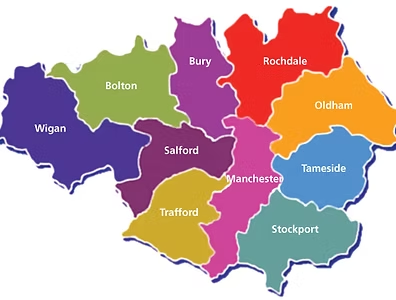

## The Purpose Of This Project

Beyond Pens, Paper and Ink: Evaluating Council Spending aims to critically examine Rochdale Borough Council’s expenditure between July 2024 and June 2025, assessing efficiency, consistency, and transparency in public spending. While the central question, “How much does a council spend on stationery?” anchors the analysis, the project extends beyond office supplies to explore broader themes of financial accountability and governance. To answer this question effectively, I am taking a structured approach:


Exploratory Data Analysis (EDA):

Aiming to uncover overarching trends in council finances, addressing questions such as:
- How does expenditure vary over time?
- Which departments spend the most?
- Which departments generate the most revenue?

Anomaly Detection:

We identify departments with an unusually high proportion of anomalous transactions, signaling potential inefficiencies or irregularities.

Final Analysis:

The final stage examines:
-  The Better Care Fund Pooled Budget, which exhibited a high anomaly rate, to understand underlying causes.
-  The five largest transactions per department, providing context for financial burdens and operational priorities.
-  Departmental expenditure trends over time.
-  Stationery spending patterns, as a case study of routine costs.


Beyond numbers, this analysis is about accountability and public trust. Local councils manage taxpayers’ money under intense scrutiny, and even minor inefficiencies can erode confidence and raise governance questions. In communities like Rochdale, where demand for services is high, financial transparency is not just a technical requirement; it is a cornerstone of democratic trust. These questions can resonate from local government chambers to national politics, influencing public perception and electoral outcomes. By combining quantitative analysis with contextual interpretation, this project seeks to provide actionable insights into spending patterns, highlight areas of concern, and contribute to the ongoing conversation about responsible public finance management.

# Data Processing

In [1]:
# Imports 

import numpy as np 
import pandas as pd
import seaborn as sns
# Jupyter lab uses inline as default so does not require specification 
import matplotlib.pyplot as plt 
from datetime import datetime
import matplotlib.dates as mdates

## Importing Data

In [2]:
# Importing the data 
# Files were not UTF-8 encoded so kept getting errors, used encoding='latin-1' to force it to load basically 

jul_2024_df = pd.read_csv("2024_Jul_Spend.csv", encoding='latin-1')
# jul_2024_df.head()
aug_2024_df = pd.read_csv("2024_Aug_Spend.csv", encoding='latin-1')
# aug_2024_df.head()
sep_2024_df = pd.read_csv("2024_Sep_Spend.csv", encoding='latin-1')
# sep_2024_df.head()
oct_2024_df = pd.read_csv("2024_Oct_Spend.csv", encoding='latin-1')
# oct_2024_df.head()
nov_2024_df = pd.read_csv("2024_Nov_Spend.csv", encoding='latin-1')
# nov_2024_df.head()
dec_2024_df = pd.read_csv("2024_Dec_Spend.csv", encoding='latin-1')
# dec_2024_df.head()
jan_2025_df = pd.read_csv("2025_Jan_Spend.csv", encoding='latin-1')
# jan_2025_df.head()
feb_2025_df = pd.read_csv("2025_Feb_Spend.csv", encoding='latin-1')
# feb_2025_df.head()
mar_2025_df = pd.read_csv("2025_Mar_Spend.csv", encoding='latin-1')
# mar_2025_df.head()
apr_2025_df = pd.read_csv("2025_Apr_Spend.csv", encoding='latin-1')
# apr_2025_df.head()
may_2025_df = pd.read_csv("2025_May_Spend.csv", encoding='latin-1')
# may_2025_df.head()
jun_2025_df = pd.read_csv("2025_Jun_Spend.csv", encoding='latin-1')
# jun_2025_df.head()

These datasets were chosen because they were updated within the last 6 months and sourced from  data.gov.uk. They account for all of Rochdale Borough Council spending between July 2024 and 2025. For each transaction they provide a significant amount of detail about each transaction. Some of which is redundant like organisation name however they provide a strong scope for temporal analysis as well as analysing individual transactions 

In [3]:
# Creating a list of dfs to join together 

df_list = [jul_2024_df, aug_2024_df, sep_2024_df, oct_2024_df, nov_2024_df, dec_2024_df, jan_2025_df, feb_2025_df, mar_2025_df, apr_2025_df, may_2025_df, jun_2025_df] 
# print(df_list)

In [4]:
# Check length - should be 12 for the number of months in a year
# Had 13 months at one point which was not the plan so this checks how many we have 

def month_checker(x): 
    if len(x) > 12:
        raise ValueError("Too many months") 
    if len(x) < 12: 
        ValueError("Not enough months") 
    if len(x) == 12: 
        print("We have 12 months of data")
        

month_checker(df_list)

We have 12 months of data


In [5]:
# Joining raw month dfs together 

big_df = pd.DataFrame() 
big_df = pd.concat(df_list) 
big_df.head()

,ORGANISATION NAME,EFEFCTIVE DATE,DIRECTORATE,SUPPLIER NAME,DATE PAID,AMOUNT (£),PURPOSE,TRANSACTION No.
0,ROCHDALE BOROUGH COUNCIL,26/07/2024,ADULT CARE LCO FUNCTIONS,POSTURITE UK LTD,26/07/2024,66.01,STATIONERY,V002027419
1,ROCHDALE BOROUGH COUNCIL,24/07/2024,CHILDRENS SOCIAL CARE,ADOPTION MATTERS NORTHWEST,24/07/2024,-1878.0,ADOPTION PAYMENTS,V002031449
2,ROCHDALE BOROUGH COUNCIL,26/07/2024,ADULT CARE LCO FUNCTIONS,POSTURITE UK LTD,26/07/2024,97.71,STATIONERY,V002032529
3,ROCHDALE BOROUGH COUNCIL,26/07/2024,ADULT CARE LCO FUNCTIONS,DORO CARE UK LTD,26/07/2024,4765.95,EQUIPMENT - GENERAL,V002065230
4,ROCHDALE BOROUGH COUNCIL,02/07/2024,ECONOMY DIRECTORATE,BANNER GROUP LIMITED,02/07/2024,4.42,PRINTING & STATIONERY,V002068062


## Organising Data

The data is organised in a complicated way with ambiguous names like 'Efefective Date' that also has a typo and 'Purpose'. I want to change column names to more effectively capture what belongs within the column. I am also going to rearrange the columns to a more logical order. I intend to use Transaction No. as an index for the dataframe. The aim of this is to improve the clarity and readability thus improving the project. 

In [6]:
# Check the column names

big_df.columns

Index(['ORGANISATION NAME', 'EFEFCTIVE DATE', 'DIRECTORATE', 'SUPPLIER NAME',
       'DATE PAID', 'AMOUNT (£)', 'PURPOSE', 'TRANSACTION No.'],
      dtype='str')

In [7]:
# Check that organisation name is the same for every transaction 

org_names = big_df['ORGANISATION NAME'].nunique()
print(org_names)

1


In [8]:
# Allows us to manually run the cell again and again without getting an error like 'Organisation name' doesnt exist 

if 'ORGANISATION NAME' in big_df.columns: 
    big_df = big_df.drop(columns=['ORGANISATION NAME'])

# Rename columns for user readability 

big_df = big_df.rename(columns= {'TRANSACTION No.': 'Transaction No.', 'EFEFCTIVE DATE': 'Transaction Date', 'DIRECTORATE': 'Department', 
                                 'SUPPLIER NAME': 'Supplier Name', 'DATE PAID': 'Date Paid', 'AMOUNT (£)': 'Amount (£)', 
                                 'PURPOSE': 'Description'}) 

# Reorder columns so we can set Transaction No as the index

new_order = ['Transaction No.', 'Transaction Date', 'Department', 'Supplier Name', 'Date Paid', 'Amount (£)', 'Description']
big_df = big_df[new_order]
# big_df.head()

## Cleaning Data

Before I can begin the analyses I need to make sure all the data is accurate, consistent and reliable in order to be more efficient. First I will check for duplicate rows, check for any duplicate Transaction No's, check Department names and Descriptions as well as creating a uniform date object to use for transaction date and date paid. 

In [9]:
# How big is big_df 

number_of_transactions = len(big_df) 
print('Number of transactions:', number_of_transactions)

# Check for duplicate records

print('Number of duplicates:', big_df.duplicated().sum())

Number of transactions: 292521
Number of duplicates: 35717


In [10]:
# Drop the duplicate rows  

big_df = big_df.drop_duplicates()
# big_df.head()

In [11]:
# Check for duplicate rows

number_of_transactions = len(big_df) 
print('Number of transactions:', number_of_transactions)
print('Number of duplicates:', big_df.duplicated().sum())

Number of transactions: 256804
Number of duplicates: 0


In [12]:
# Check for duplicate transaction numbers that would prevent us from using it as an index

num_duplicates = big_df['Transaction No.'].duplicated().sum()
print('Number of duplicate Transaction No:', num_duplicates)

Number of duplicate Transaction No: 99969


In [13]:
# I want to have a look at these dupes 

dupes = big_df[big_df['Transaction No.'].duplicated()]
dupes.head(20)

,Transaction No.,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
6,V002089015,23/07/2024,ECONOMY DIRECTORATE,SWIFT SECURITY PRODUCTS LTD,23/07/2024,1094.0,ELECTRICAL
38,V002199102,02/07/2024,EARLY HELP AND SCHOOLS,DDH FABRICATIONS NW LTD,02/07/2024,10.0,REPAIRS & ALTS OF BUILDINGS
42,V002205361,05/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,FRANCOTYP POSTALIA LTD - POSTAGE,05/07/2024,12.0,EQUIPMENT - GENERAL
44,V002206226,05/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,FRANCOTYP POSTALIA LTD - POSTAGE,05/07/2024,12.0,EQUIPMENT - GENERAL
51,V002209803,01/07/2024,ECONOMY DIRECTORATE,DWF LAW LLP,01/07/2024,1430.0,LEGAL SERVICES EXTERNAL
74,V002214481,23/07/2024,EARLY HELP AND SCHOOLS,UK IDENTITY,23/07/2024,1.3,POLICE CHECKS ON NEW RECRUITS
84,V002219388,22/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,SWIFT SECURITY PRODUCTS LTD,22/07/2024,315.0,BUILDING MATERIALS
86,V002219399,29/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,SWIFT SECURITY PRODUCTS LTD,29/07/2024,452.0,BUILDING MATERIALS
93,V002220148,22/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,SWIFT SECURITY PRODUCTS LTD,22/07/2024,216.5,BUILDING MATERIALS
97,V002222211,22/07/2024,NEIGHBOURHOODS AND ENVIRONMENT,SWIFT SECURITY PRODUCTS LTD,22/07/2024,650.0,BUILDING MATERIALS


Thankfully it does not appear to be a problem with the data. The council is using the same transaction numbers for different transactions. Originally I had thought the council was using the same transaction numbers when the data within the row is identical except the amount. However looking at the middle section of this sample we can see 3 different transaction numbers with the same transaction date on 22/07/2024 for Neighboods and Environment to Swift Security Products LTD for building materials. If the theory was correct these 3 transactions would have the same transaction number but they do not. Without the necessary information from the council to shed light on this problem I need to come up with a method that does not require the removal of 99,969 transactions. A solution to this is to create a cumulative count column that groups transactions by transaction number and numbers 'ranks' them. This method allows us to keep all 99,969 transactions without losing track and having multiple transactions related to the same index. 

In [14]:
# Set index to Transaction No. to act as primary index 
# Set Copy No as secondary index 

big_df['Copy No.'] = big_df.groupby('Transaction No.').cumcount() + 1
big_df = big_df.set_index(['Transaction No.', 'Copy No.'])
big_df.head()

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002027419,1,26/07/2024,ADULT CARE LCO FUNCTIONS,POSTURITE UK LTD,26/07/2024,66.01,STATIONERY
V002031449,1,24/07/2024,CHILDRENS SOCIAL CARE,ADOPTION MATTERS NORTHWEST,24/07/2024,-1878.0,ADOPTION PAYMENTS
V002032529,1,26/07/2024,ADULT CARE LCO FUNCTIONS,POSTURITE UK LTD,26/07/2024,97.71,STATIONERY
V002065230,1,26/07/2024,ADULT CARE LCO FUNCTIONS,DORO CARE UK LTD,26/07/2024,4765.95,EQUIPMENT - GENERAL
V002068062,1,02/07/2024,ECONOMY DIRECTORATE,BANNER GROUP LIMITED,02/07/2024,4.42,PRINTING & STATIONERY


In [15]:
# Check it worked 

V002225186 = big_df.loc['V002225186']
V002225186

,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Copy No.,,,,,,
1,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,44.98,EQUIPMENT - GENERAL
2,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,35.91,EQUIPMENT - GENERAL
3,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,79.98,EQUIPMENT - GENERAL
4,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,55.96,EQUIPMENT - GENERAL
5,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,26.49,EQUIPMENT - GENERAL
6,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,21.49,EQUIPMENT - GENERAL
7,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,14.49,EQUIPMENT - GENERAL
8,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,44.97,EQUIPMENT - GENERAL
9,22/07/2024,EARLY HELP AND SCHOOLS,YORKSHIRE PURCHASING ORGANISATION,22/07/2024,9.16,EQUIPMENT - GENERAL


In [16]:
# Check date column now for uniformity 

# Documentation from ttps://pandas.pydata.org/docs/user_guide/timeseries.html 
# Convert dates to date time objects in the transaction date colum replacing those that cannot be converted to NaTs
big_df['Temporary Dates'] = pd.to_datetime(big_df['Transaction Date'], dayfirst=True, errors='coerce')

# Total dates that could not be converted 
number_not_converted = big_df['Temporary Dates'].isna().sum() 
print(f"Number of dates not converted: {number_not_converted}")

# If there are dates that couldnt be converted store them and print them 
if number_not_converted > 0: 
    dates_to_investigate = big_df[big_df['Temporary Dates'].isna()]['Transaction Date']

print(dates_to_investigate) 

Number of dates not converted: 150466
Transaction No.  Copy No.
V002054211       1           05-Dec-24
V002092734       1           05-Dec-24
V002191195       1           17-Dec-24
V002222343       1           10-Dec-24
V002222501       1           20-Dec-24
                               ...    
V002440768       1           30-Jun-25
V002440769       1           30-Jun-25
V002440771       1           30-Jun-25
V002440820       1           27-Jun-25
V002440917       1           27-Jun-25
Name: Transaction Date, Length: 150466, dtype: str


Originally dates were recorded 'DD/MM/YY' but these dates are in 'DD-Month-YY'. Looking at the dates to investigate the first is December which means the council changed the format when recording dates in December which ruins the uniformity of this column, but also the Date Paid column. All dates must first be normalised to the same format and then converted to our chosen format YY-MM-DD to be used as a date object. By converting to a date object now we can save time later during analyses. 

In [17]:
# Drop temporary dates if we still have it

if 'Temporary Dates' in big_df.columns: 
    big_df = big_df.drop(columns=['Temporary Dates'])

# Function to convert the formats of dates 
# https://docs.python.org/3/library/datetime.html

def date_formatter(date_string):

    # if it is not a string leave it 
    if not isinstance(date_string, str):
        return date_string

    # if it is a string - convert to d/m/y same as the others - normalise
    try: 
        date_object = datetime.strptime(date_string, '%d-%b-%y')
        return date_object.strftime('%d/%m/%Y')
    except ValueError: 
        return date_string

# Applying the date formatter 
big_df['Transaction Date'] = big_df['Transaction Date'].apply(date_formatter) 
big_df['Date Paid'] = big_df['Date Paid'].apply(date_formatter) 

# Turning them into actual date objects for analysis later - normalised above so should work 
if big_df['Transaction Date'].dtype == 'object': 
    big_df['Transaction Date'] = pd.to_datetime(big_df['Transaction Date'], dayfirst=True, errors='coerce')
    big_df['Date Paid'] = pd.to_datetime(big_df['Date Paid'], dayfirst=True, errors='coerce')

# check 
print(big_df['Transaction Date'].dtype)
print(big_df['Date Paid'].dtype)

# Sort big df into chronlogical order     
big_df = big_df.sort_values('Transaction Date', ascending=True)
# big_df.head()

str
str


In [18]:
# Check all dates 

number_not_converted = big_df['Transaction Date'].isna().sum() 
print(f"Number of dates not converted: {number_not_converted}") 

Number of dates not converted: 0


In [19]:
# Function to convert amount (£) to clean float column 

# Inititally removed commas, but then errors kept coming up for different characters so i added them - maybe easier way ? 
def float_converter(amount_string): 
    if type(amount_string) == float: 
        return amount_string 
    if type(amount_string) == str: 
        amount_string = amount_string.replace(",", "")
        amount_string = amount_string.replace("£", "")
        amount_string = amount_string.replace("(", "") 
        amount_string = amount_string.replace(")", "")
        amount_string = float(amount_string) 
        return amount_string 
    if type(amount_string) == int: 
        amount_string = float(amount_string)
        return amount_string

# Applying float converter 
big_df['Amount (£)'] = big_df['Amount (£)'].apply(float_converter)
#big_df.head() 

Arguably the most crucial component of this project to clean. In order to be able to do more or less anything this column must be floats to allow decimals. Therefore we must account for both integers and strings. If the item is already a float, leave it. If it is a string remove certain characters and it it is an integer convert it to a float

In [20]:
# Checking department names 

print(big_df['Department'].unique())

<ArrowStringArray>
[           'ECONOMY DIRECTORATE', 'BETTER CARE FUND POOLED BUDGET',
                      'RESOURCES',         'EARLY HELP AND SCHOOLS',
 'NEIGHBOURHOODS AND ENVIRONMENT',       'ADULT CARE LCO FUNCTIONS',
          'PROPERTY AND HIGHWAYS',                  'PUBLIC HEALTH',
    'COMMISSIONING AND STATUTORY',         'CHILDRENS SOCIAL CARE',
                       'FINANCE ',                'FINANCE CONTROL',
                        'FINANCE',              'OBSOLETE SERVICES',
                'CONTROL ACCOUNT',      'BUSINESS RATES BID INCOME',
                'COLLECTION FUND']
Length: 17, dtype: str


In [21]:
# Cleaning adult care functions, child social care and finance  

big_df['Department'] = big_df['Department'].replace({'CHILDREN\x92S SOCIAL CARE' : 'CHILD SOCIAL CARE',
                                                     'FINANCE ' : 'FINANCE', 
                                                     'ADULT CARE LCO FUNCTIONS' : 'ADULT CARE FUNCTIONS'}) 

# Checking names are cleaned 
print(big_df['Department'].unique())

<ArrowStringArray>
[           'ECONOMY DIRECTORATE', 'BETTER CARE FUND POOLED BUDGET',
                      'RESOURCES',         'EARLY HELP AND SCHOOLS',
 'NEIGHBOURHOODS AND ENVIRONMENT',           'ADULT CARE FUNCTIONS',
          'PROPERTY AND HIGHWAYS',                  'PUBLIC HEALTH',
    'COMMISSIONING AND STATUTORY',              'CHILD SOCIAL CARE',
                        'FINANCE',                'FINANCE CONTROL',
              'OBSOLETE SERVICES',                'CONTROL ACCOUNT',
      'BUSINESS RATES BID INCOME',                'COLLECTION FUND']
Length: 16, dtype: str


I wanted to avoid having duplicate department names based of tiny differences in input. This will make it easier during analysis and prevent me from having to do 'FINANCE ' and 'FINANCE' for example. 

In [22]:
# Checking supplier name and description 

num_of_suppliers = big_df['Supplier Name'].nunique() 
num_of_descriptions = big_df['Description'].nunique()

print('Number of different suppliers:', num_of_suppliers) 
print('Number of different descriptions:', num_of_descriptions) 

Number of different suppliers: 2800
Number of different descriptions: 332


At the start of the cleaning stage I had intended to clean both supplier names and descriptions. However the large number of both would make this a time consuming task. One way to overcome this challenge would be to categorise descriptions however this is not possible without context behind the descriptions as most lack specificity. In a similar manner to how there were originally 2 different variations of Finance in Departments there could be numerous variations per supplier which adds complexity to this particular column. On the other hand, I do not plan on looking in depth at suppliers, hence it would be inefficient to spend large amounts of time cleaning each supplier name when I could be focusing on other areas of the analysis. 

## Final Dataset

In [23]:
big_df

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002230351,1,01/04/2025,ECONOMY DIRECTORATE,I BRANDED LTD,01/04/2025,411.34,MARKETING EXPENDITURE
V002353948,1,01/04/2025,BETTER CARE FUND POOLED BUDGET,PENNINE CARE NHS,01/04/2025,32621.08,INDEPENDENT UNITS
V002367370,1,01/04/2025,RESOURCES,VALTECH LTD,01/04/2025,488.40,EXTERNAL CONTRACTED PRINTING
V002371720,1,01/04/2025,EARLY HELP AND SCHOOLS,BANNER GROUP LIMITED,01/04/2025,20.00,STATIONERY
V002373643,1,01/04/2025,NEIGHBOURHOODS AND ENVIRONMENT,REDFOX COUNTRYSIDE SERVICES,01/04/2025,695.00,EQUIPMENT - GENERAL
...,...,...,...,...,...,...,...
V002325618,1,31/10/2024,NEIGHBOURHOODS AND ENVIRONMENT,G A ELECTRICAL DISTRIBUTORS LIMITED,31/10/2024,142.99,BUILDING MATERIALS
V002325620,1,31/10/2024,CHILD SOCIAL CARE,REDACTED - PERSONAL DATA,31/10/2024,88.50,CHILDRENS SUBSISTENCE
V002325621,1,31/10/2024,CHILD SOCIAL CARE,REDACTED - PERSONAL DATA,31/10/2024,75.00,YOUNGE PERSONS ALLOWANCE


On final read through I have potentially found a problem during the cleaning stage. Once the dfs were concatenated vertically there were 292,521 transactions with 35,717 duplicate rows. At the time I did not think much of this and dropped them. However, given that duplicate transactions are possible, and that mulitple transactions can be made to the same supplier for the same department for the same description. The 35,717 duplicate rows may actually have been valid transactions. On the other hand it would have been very difficult to analyse transactions with that many duplicates, furthermore it would have been impossible to determine between valid transactions and accidental duplicates. 

# Exploratory Data Analysis 

## Summary Statistics

In [24]:
# Basic Analysis 

total_spent = big_df['Amount (£)'].sum()
number_of_transactions = len(big_df) 
number_of_departments = big_df['Department'].nunique() 
number_of_suppliers = big_df['Supplier Name'].nunique() 
mean_spend = total_spent / number_of_transactions

print(
    f"{number_of_departments:,} Departments used\n"
    f"{number_of_suppliers:,} different suppliers in\n"
    f"{number_of_transactions:,} transactions\n"
    f"Spending an average of £{mean_spend:,.2f} per transaction\n"
    f"For a grand total of £{total_spent:,.2f}\n")

16 Departments used
2,800 different suppliers in
256,804 transactions
Spending an average of £1,811.10 per transaction
For a grand total of £465,098,352.64



## Expenditure Over Time

In this section I will be analysing Rochdale Borough Councils total expenditure over time, breaking it down into total monthly expenditure. Graphs will also be produced to visulise changes in monthly expenditure as well as how monthly expenditure accumulates over time.

In [25]:
# month creator - Month dfs will be used later in analysis 

def month_df_creator(start_date, end_date): 
    df = big_df[(big_df['Transaction Date'] >= (start_date)) &
                 (big_df['Transaction Date'] <= (end_date))].copy() 
    return df 

In [26]:
# Creating monthly totals df - function could do this ?? - see below 

monthly_totals = []  

# july 
july_df = month_df_creator('2024-07-01', '2024-07-31')
july_total = july_df['Amount (£)'].sum()
july_dict = {'Month' : 'July', 'Spent' : july_total} 
monthly_totals.append(july_dict)

# august 
august_df = month_df_creator('2024-08-01', '2024-08-31')
august_total = august_df['Amount (£)'].sum()
august_dict = {'Month' : 'August', 'Spent' : august_total} 
monthly_totals.append(august_dict)

# september 
september_df = month_df_creator('2024-09-01', '2024-09-30')
september_total = september_df['Amount (£)'].sum()
september_dict = {'Month' : 'September', 'Spent' : september_total} 
monthly_totals.append(september_dict)

# Oct
oct_df = month_df_creator('2024-10-01', '2024-10-31')
oct_total = oct_df['Amount (£)'].sum()
oct_dict = {'Month' : 'October', 'Spent' : oct_total} 
monthly_totals.append(oct_dict)

# Nov 
nov_df = month_df_creator('2024-11-01', '2024-11-30')
nov_total = nov_df['Amount (£)'].sum()
nov_dict = {'Month' : 'November', 'Spent' : nov_total} 
monthly_totals.append(nov_dict)

# Dec
dec_df = month_df_creator('2024-12-01', '2024-12-31')
dec_total = dec_df['Amount (£)'].sum()
dec_dict = {'Month' : 'December', 'Spent' : dec_total} 
monthly_totals.append(dec_dict)

# Jan
jan_df = month_df_creator('2025-01-01', '2025-01-31')
jan_total = jan_df['Amount (£)'].sum()
jan_dict = {'Month' : 'January', 'Spent' : jan_total} 
monthly_totals.append(jan_dict)

# Feb
feb_df = month_df_creator('2025-02-01', '2025-02-28') # I checked feb 2025 had 28 days 
feb_total = feb_df['Amount (£)'].sum()
feb_dict = {'Month' : 'February', 'Spent' : feb_total} 
monthly_totals.append(feb_dict)

# Mar 
mar_df = month_df_creator('2025-03-01', '2025-03-31')  
mar_total = mar_df['Amount (£)'].sum()
mar_dict = {'Month' : 'March', 'Spent' : mar_total} 
monthly_totals.append(mar_dict)

# Apr 
apr_df = month_df_creator('2025-04-01', '2025-04-30')  
apr_total = apr_df['Amount (£)'].sum()
apr_dict = {'Month' : 'April', 'Spent' : apr_total} 
monthly_totals.append(apr_dict)


# May
may_df = month_df_creator('2025-05-01', '2025-05-31')  
may_total = may_df['Amount (£)'].sum()
may_dict = {'Month' : 'May', 'Spent' : may_total} 
monthly_totals.append(may_dict)

# Jun 
jun_df = month_df_creator('2025-06-01', '2025-06-30')  
jun_total = jun_df['Amount (£)'].sum()
jun_dict = {'Month' : 'June', 'Spent' : jun_total} 
monthly_totals.append(jun_dict)

In [27]:
# Creating the months to loop through - faster way 

monthly_totals = []

months = [
    ('July', '2024-07-01', '2024-07-31'),
    ('August', '2024-08-01', '2024-08-31'),
    ('September', '2024-09-01', '2024-09-30'),
    ('October', '2024-10-01', '2024-10-31'),
    ('November', '2024-11-01', '2024-11-30'),
    ('December', '2024-12-01', '2024-12-31'),
    ('January', '2025-01-01', '2025-01-31'),
    ('February', '2025-02-01', '2025-02-28'),
    ('March', '2025-03-01', '2025-03-31'),
    ('April', '2025-04-01', '2025-04-30'),
    ('May', '2025-05-01', '2025-05-31'),
    ('June', '2025-06-01', '2025-06-30'),
]


# Not a function but a loop that uses the function previously created to do the same as above - however doesnt save dfs. the variable df is changed each date - Month DFs are no longer used anyway so not a problem
for month, start, end in months:
    df = month_df_creator(start, end)
    total = df['Amount (£)'].sum()
    monthly_totals.append({'Month': month, 'Spent': total})

Initially thought I would be using individual months during the final analyses stage. However due to time constraints I was unable to deep dive into transactions per month, further more including this as a final analysis would not have had much impact as it is difficult to analyse suppliers and descriptions. This would have only left department monthly transactions, which could have been interesting for example how is the number of transactions per departmnet affected by month. On the other hand this is somehwat indicated by total spend per month per department which is already present. Therefore i created this loop to form the data to be used in a monthly total expenditure table. 

In [28]:
# Monthly Spend DF 

monthly_totals_df = pd.DataFrame(monthly_totals)

# New column name to track the progression of spending
monthly_totals_df['Total Spent'] = monthly_totals_df['Spent'].cumsum()
# New column for % of total spend 
monthly_totals_df['Percentage of Total Expenditure (%)'] = (monthly_totals_df['Spent']/total_spent)*100

# Dealing with decimals 
monthly_totals_df['Spent'] = monthly_totals_df['Spent']/1e6
monthly_totals_df['Total Spent'] = monthly_totals_df['Total Spent']/1e6

# Renaming to account for the change in decimal 
monthly_totals_df.rename(columns={'Spent' : 'Expenditure (Million £)', 'Total Spent' : 'Cumulative Expenditure (Million £)'}, inplace=True)
display_df = monthly_totals_df.set_index('Month') 
display_df

,Expenditure (Million £),Cumulative Expenditure (Million £),Percentage of Total Expenditure (%)
Month,,,
July,0.0,0.0,0.0
August,0.0,0.0,0.0
September,0.0,0.0,0.0
October,0.0,0.0,0.0
November,0.0,0.0,0.0
December,0.0,0.0,0.0
January,0.0,0.0,0.0
February,0.0,0.0,0.0
March,0.0,0.0,0.0


In [29]:
# Descriptive statistics on Monthly Spending 

mean_monthly_spend = monthly_totals_df['Expenditure (Million £)'].mean()
mean_percent_spend = monthly_totals_df['Percentage of Total Expenditure (%)'].mean() 
std_percent_spend = monthly_totals_df['Percentage of Total Expenditure (%)'].std()
range_percent_spend = monthly_totals_df['Percentage of Total Expenditure (%)'].max() - monthly_totals_df['Percentage of Total Expenditure (%)'].min()


print(f"Mean monthly amount apent: £{mean_monthly_spend*1e6:,.2f}\n"
      f"Mean percentage spent per month: {mean_percent_spend}\n"
      f"With a standard deviation of {round(std_percent_spend, 2)} and a range of {round(range_percent_spend, 2)}")

Mean monthly amount apent: £0.00
Mean percentage spent per month: 0.0
With a standard deviation of 0.0 and a range of 0.0


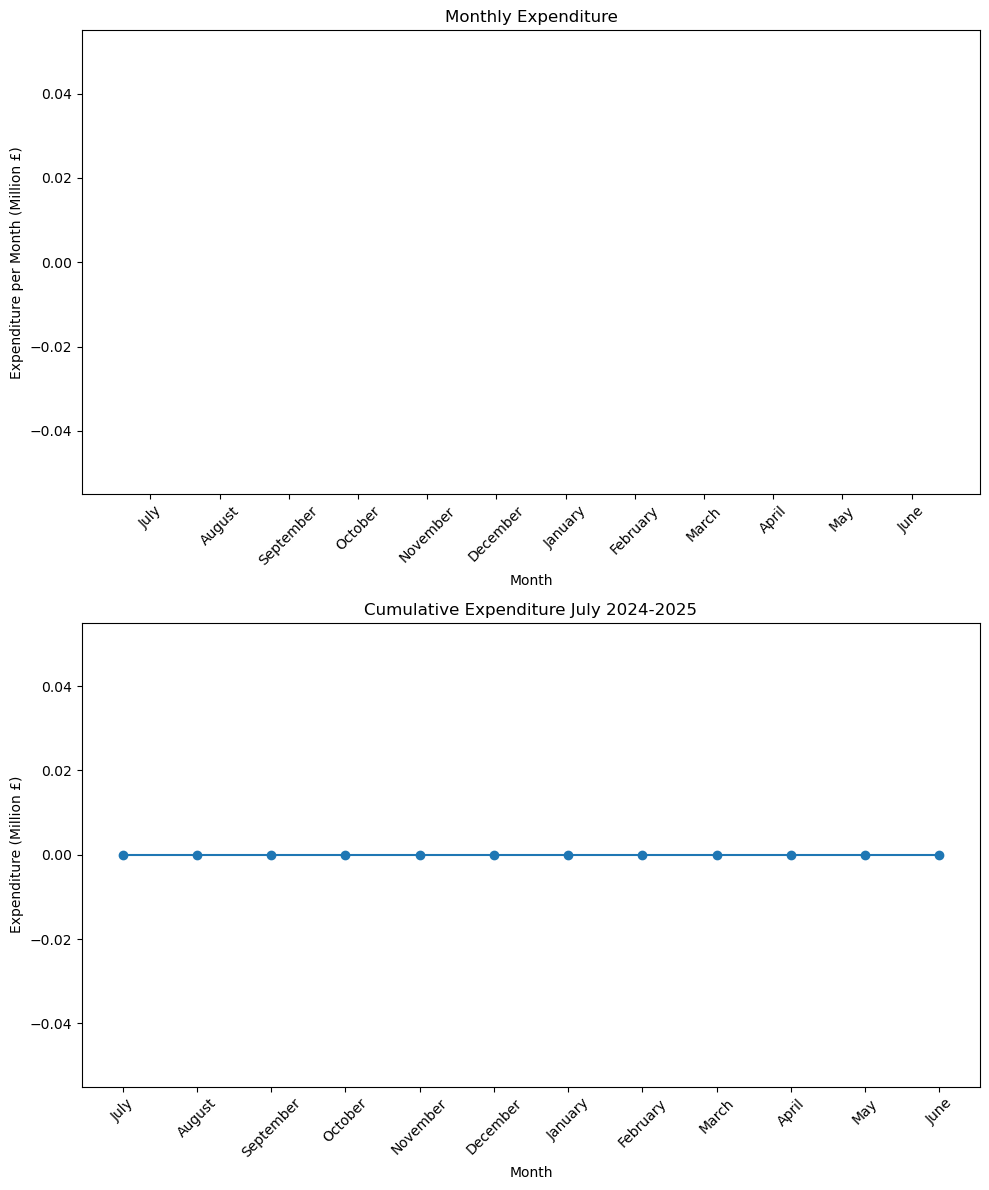

In [30]:
# Visualisation - 2 plots (Bar and Line) 

plt.figure(figsize=(10, 12)) 

# Figure 1 
plt.subplot(2, 1, 1) 
plt.bar(monthly_totals_df['Month'], monthly_totals_df['Expenditure (Million £)'], color='purple')
plt.xlabel('Month')
plt.ylabel('Expenditure per Month (Million £)')
plt.title('Monthly Expenditure')
plt.xticks(rotation=45)

# Figure 2 
plt.subplot(2, 1, 2) 
plt.plot(monthly_totals_df['Month'], monthly_totals_df['Cumulative Expenditure (Million £)'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Expenditure (Million £)')
plt.title('Cumulative Expenditure July 2024-2025')
plt.xticks(rotation=45)

# Show 
plt.tight_layout()
plt.show()

Using both a bar chart and a line graph allows monthly expenditure to be analysed from two complementary perspectives. The bar chart highlights discrete differences in spending between individual months, making it easy to compare exact values between a given point in time. This is supplemented by the line graph, which emphasises the overall trend and magnitude of change across months. For example, a jagged line indicates large fluctuations in expenditure between consecutive months, whereas a flatter, more uniform line suggests steady and predictable spending patterns. Together, these visualisations provide both detailed comparison and broader contextual insight into spending behaviour.

### Findings

Cumulative expenditure between July 2024 and June 2025 follows a linear trend, indicating that the council spending is a consistent predictable rate. Additionally, the consistency in expenditure over time supports the reliability of the dataset, with no artificial peaks or troughs. There are no periods where the line significantly steepens or flattens. Overall, this result suggests council spending is evenly distributed across each month with roughly the same amount being spent per month. This indicates strong and predictable financial planning likely with planned procurement cycles, consistent suppliers and routine delivery.  As a result, the council is not prone to sudden bursts or prolonged periods of increased/decreased expenditure. This would make sense considering that most of the council expenditure likely occurs in regular cycles like staffing, maintenance and adult/child social care.

The bar chart supports the claims above, as there is no significant deviation in monthly expenditure between July and June. The mean monthly spend is £38,758,196.05 which equates to 8.3% of total expenditure is exactly 1/12 solidifying the councils overall financial competency. Furthermore, a standard deviation of 0.47 and a narrow range of 1.18 suggests spending is tightly controlled and monitored with enough headroom to handle unexpected costs. Although the council appears to have been affected by unexpected costs in July, October, November, April and June due to the increased expenditure it is insignificant. October and November could be perceived as a small seasonal peak in the run up to Christmas, but this trend does not continue into December disproving this theory. Without any obvious reasons for increased spending in these months it must be assumed to be due to unexpected costs.

## Expenditure By Department

This section will analyse which council departments have the highest expenditure. Understanding which departments receive the largest share of the budget can provide insight into the council’s priorities and operations, as departments with higher spending are likely to play a more significant role in serving the community.

In [31]:
# List of departments 

departments = big_df['Department'].unique().tolist() 
# departments

In [32]:
# Calculate spend by department 

department_spend = [] 

def dept_spend(x):
    for i in x: 
        dept_spent = big_df[big_df['Department'] == i]['Amount (£)'].sum()
        dept_spent = dept_spent/1e6
        department_spend.append(dept_spent) 

# Apply
dept_spend(departments)

# Calculating the number of transaction per department
dept_transaction_count = [len(big_df[big_df['Department'] == dept]) for dept in departments]

# converting to array so we can get the mean spend per transaction 
dept_transaction_count = np.array(dept_transaction_count)

In [33]:
# Creating a df 

spend_by_departments = pd.DataFrame({'Department': departments, 
                                     'Department Expenditure (Million £)': department_spend, 
                                     'Number of Transactions' : dept_transaction_count, 
                                     'Mean Expenditure Per Transaction (£)': (department_spend/dept_transaction_count)*1e6,
                                     'Percent of Total Expenditure (%)': (department_spend/(total_spent/1e6))*100})
spend_by_departments_sorted = spend_by_departments.sort_values('Department Expenditure (Million £)', ascending=False) 
spend_by_departments_sorted = spend_by_departments_sorted.set_index(['Department'])
spend_by_departments_sorted

,Department Expenditure (Million £),Number of Transactions,Mean Expenditure Per Transaction (£),Percent of Total Expenditure (%)
Department,,,,
ADULT CARE FUNCTIONS,133.974187,86016,1557.549609,28.805560
EARLY HELP AND SCHOOLS,88.723736,24916,3560.914114,19.076338
NEIGHBOURHOODS AND ENVIRONMENT,47.704921,94248,506.163747,10.256953
ECONOMY DIRECTORATE,42.803188,6213,6889.294685,9.203040
CHILD SOCIAL CARE,32.993467,31168,1058.568625,7.093869
PROPERTY AND HIGHWAYS,29.644947,5065,5852.901739,6.373909
PUBLIC HEALTH,28.337851,3198,8861.116726,6.092873
COLLECTION FUND,23.423484,36,650652.333333,5.036243
RESOURCES,19.578603,5201,3764.392065,4.209562


###### Helpful Example Form W3 schools

In [34]:
# copied from W3 schools to work out what i needed to do for my pie chart

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.2, 0, 0, 0]

# plt.pie(y, labels = mylabels, explode = myexplode)
# plt.show() 

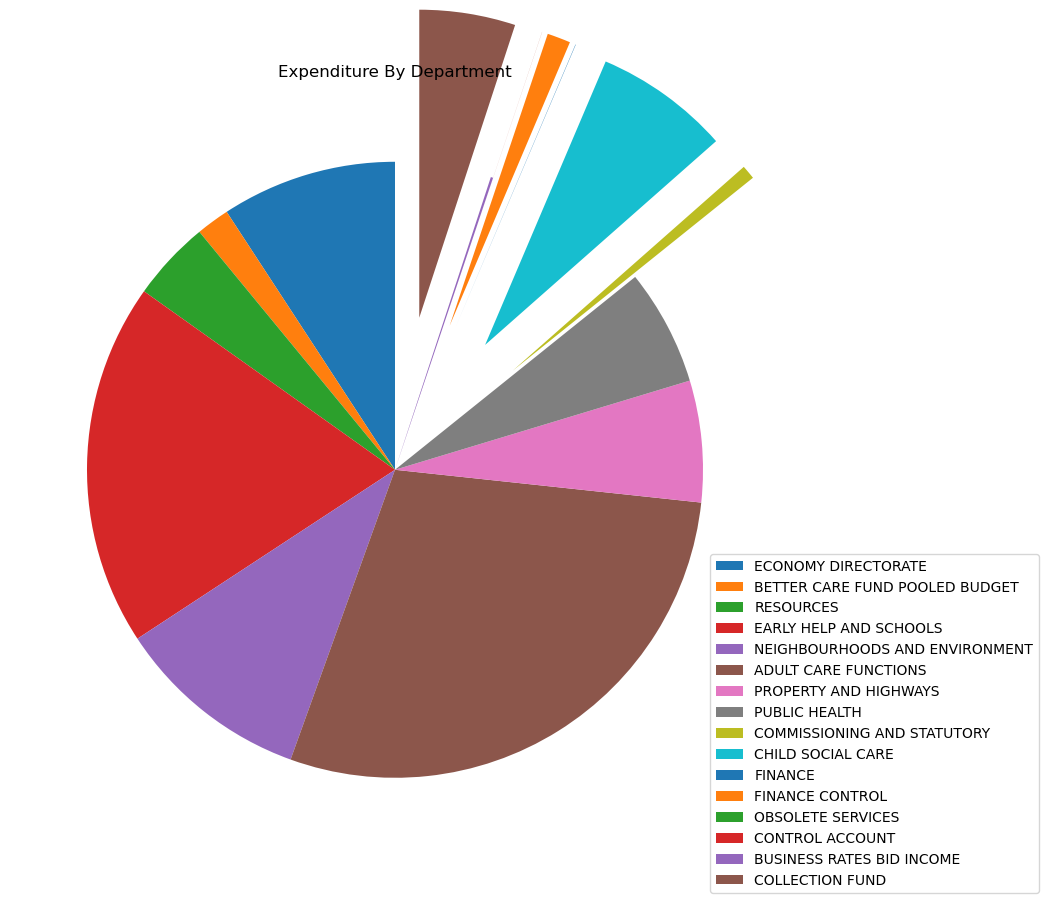

In [35]:
# Pie chart 
# I wanted to explode the last 4 becuase they are to small to see (https://www.w3schools.com/python/matplotlib_pie_charts.asp) 
# Couldnt get it to work - eventually did 

y = np.array(spend_by_departments['Department Expenditure (Million £)'].to_list())
labels = np.array(spend_by_departments['Department'].to_list())
my_explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0.5]

# Create pie chart
plt.figure(figsize=(12, 10))
plt.pie(y, startangle=90, explode=my_explode)

plt.title('Expenditure By Department')
plt.legend(labels, bbox_to_anchor= [0.9, 0.4])
plt.show()

A pie chart was chosen in this instance to effectively illustrate the proportional distribution of the council’s budget across its priority departments. Unlike a bar chart, which emphasises absolute comparisons, a pie chart allows the viewer to quickly grasp how each department contributes to the whole budget. This makes it particularly useful for communicating priorities, as departments with larger allocations are immediately identifiable through their larger “slices” of the pie. Additionally, using a pie chart provided an opportunity to explore different visualisation techniques while maintaining clarity and interpretability of the data.

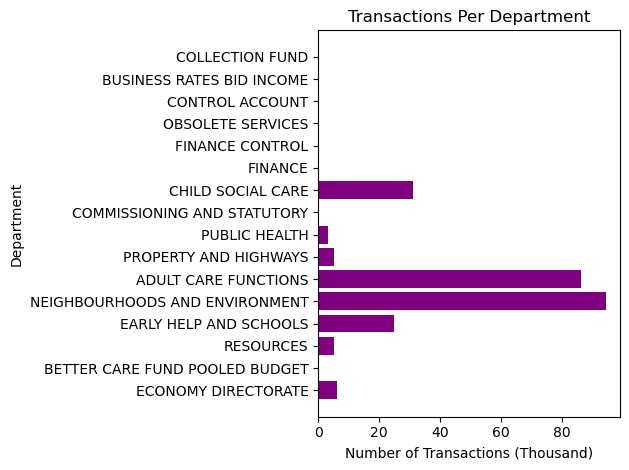

In [36]:
# Transactions per Department

plt.barh(spend_by_departments['Department'], spend_by_departments['Number of Transactions']/1e3, color='purple')
plt.xlabel('Number of Transactions (Thousand)')
plt.ylabel('Department')
plt.title('Transactions Per Department')

# Show 
plt.tight_layout()
plt.show()

### Findings 

As expected, both child and adult social care are in the top 5 largest Department spends with £33.00 and £133.97 million a year representing 7.1% and 28.8% of total expenditure. However, both departments have relatively small spend per transaction. This would indicate many small to medium routine payments likely for home care packages or residential fees. This is also in line with national trends, with adult social care being the biggest pressure on local councils. 

Furthermore, Early Help and Schools department spend the second most with £88.72 million a year representing 19.1% of total expenditure. This department spends on average more than both child and adult social care combined per transaction with £3560.91. This indicates a major operational cost for the council providing school suppliers, services and staffing related costs. 

The Economy Directorate, Property & Highways, and Public Health (9.2%, 6.4% and 6.1% of total expenditure respectively) departments all demonstrate spending patterns characterised by fewer but significantly higher-value transactions. The Economy Directorate records an average transaction size of £6,889, while Property & Highways averages £5,853, reflecting the capital-intensive nature of infrastructure work, building maintenance, and project-based procurement. Public Health shows the highest average transaction value at £8,861 despite having only 3,198 transactions, likely due to large contractual payments to commissioned health providers and external partners rather than routine operational costs. Together, these departments highlight areas of council activity where spending is concentrated in substantial, strategically important payments rather than high-volume day-to-day expenditure.

Interestingly, two departments with relatively ambiguous names 'Better Care Fund Pooled Budget' and the 'Collection Fund' show very distinctive spending patterns. The Better Care Fund Pooled Budget records a moderate annual spend of £8.14 million (1.7% of total expenditure) but does so through only 40 transactions, resulting in an exceptionally high mean transaction value of £203,447.35. Similarly, the Collection Fund spends £23.42 million across just 36 transactions, with an average payment of £650,652.33. These extremely large, low-volume transactions probably reflect statutory financial transfers, pooled budget contributions, and/or movements between government funding schemes rather than day-to-day operational spending. However, this can only be proven with a closer examination in later stages of this analysis.

## Revenue By Department

Although the datasets used in this analysis were of council spending, the frequent negative spend transactions must be some form of revenue. However, the small number of negatives spend transactions (12,430) indicate a certain type of revenue generation. Conversely, these transactions could have been the council moving money within their own accounts or paying themselves however the wide range of suppliers disproves this theory, and again the true purpose of these negatives spend transactions can only be determined through conversations with the council itself and thus will be interpreted in this analysis as revenue.

In [37]:
# Revenue df

revenue_df = big_df.loc[big_df['Amount (£)'] < 0].copy()

# Make the amounts positive

revenue_df['Amount (£)'] = revenue_df['Amount (£)'].abs()
print(f"The number of negative spend transations: {len(revenue_df)}")

The number of negative spend transations: 12430


In [38]:
# list of unique department names
revenue_departments = revenue_df['Department'].unique()

no_rev = set(departments) - set(revenue_departments)
print(f"{no_rev} did not generate revenue")

{'CONTROL ACCOUNT', 'COLLECTION FUND', 'FINANCE'} did not generate revenue


In [39]:
# Total revenue and mean revenue per transaction 

total_revenue = revenue_df['Amount (£)'].sum()
mean_revenue_per_transaction = revenue_df['Amount (£)'].mean() 

print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Mean Revenue per transaction: £{mean_revenue_per_transaction:,.2f}")

Total Revenue: £11,064,287.50
Mean Revenue per transaction: £890.13


In [40]:
# Reuse code from the spend by departments 

# calculate the revenue per department in unique departments
department_revenue = [] 
for i in revenue_departments: 
    dept_rev = revenue_df[revenue_df['Department']== i]['Amount (£)'].sum()
    dept_rev = round((dept_rev/1e3), 2)
    department_revenue.append(dept_rev) 

# Calculating the number of transaction per department and converting to array for division 
number_of_transactions = [len(revenue_df[revenue_df['Department'] == dept]) for dept in revenue_departments]
number_of_transactions = np.array(number_of_transactions)

In [41]:
# Creating the revenue by departments df

revenue_by_departments = pd.DataFrame({'Department': revenue_departments, 
                                       'Department Revenue (Thousand £)' : department_revenue, 
                                       'Number of Transactions' : number_of_transactions,
                                       'Mean Revenue Per Transaction (£)': (department_revenue/number_of_transactions)*1e3})
revenue_by_departments_sorted = revenue_by_departments.sort_values('Department Revenue (Thousand £)', ascending=False)
revenue_by_departments_sorted = revenue_by_departments_sorted.set_index('Department')
revenue_by_departments_sorted

,Department Revenue (Thousand £),Number of Transactions,Mean Revenue Per Transaction (£)
Department,,,
ADULT CARE FUNCTIONS,6044.97,7325,825.251877
EARLY HELP AND SCHOOLS,2742.91,784,3498.609694
ECONOMY DIRECTORATE,803.89,155,5186.387097
NEIGHBOURHOODS AND ENVIRONMENT,449.12,1812,247.858720
CHILD SOCIAL CARE,364.38,550,662.509091
RESOURCES,277.42,1677,165.426357
PROPERTY AND HIGHWAYS,151.91,62,2450.161290
BETTER CARE FUND POOLED BUDGET,85.54,1,85540.000000
PUBLIC HEALTH,79.57,45,1768.222222


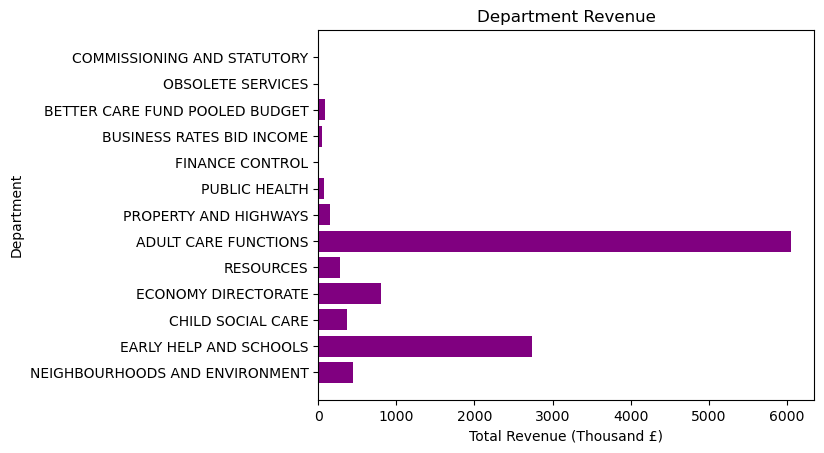

In [42]:
# Visualisation of Revenue per Department

plt.barh(revenue_by_departments['Department'], revenue_by_departments['Department Revenue (Thousand £)'], color='purple')
plt.xlabel('Total Revenue (Thousand £)')
plt.ylabel('Department')
plt.title('Department Revenue')
plt.show()

### Findings

Similarly to expenditure by department, adult and child social care are in the top 5 for revenue generated with £604,497 and £36,438. Both departments have a relatively small revenue per transaction indicating small but frequent transactions in line with their expenditure characteristics. Early Help and Schools department is also present in the top 5 for revenue generated with £274,291, this department differs from adult and child social care with less frequent but larger transactions. 

Additionally, Highways and Property and the Economy Directorate follow Early Help and Schools in larger less frequent transactions. This suggests these departments handle mostly large infrequent transactions to generate revenue. On the other hand, we have Resources (£277,430), Neighbourhoods and Environment (£449,120), Adult Care (£604,497) who have small frequent transactions averaging £165.43, £247.86, £825.25 per transaction respectively, indicating operational low level income streams.

Finally, the Better Care Fund Pooled Budget generated a one-off payment of £85,540. This was the largest mean revenue per transaction across all departments, highlighting that this department’s revenue activity is a single, substantial transaction rather than frequent, smaller payments. Notably, it is one of only four departments in the council that generated revenue from a single transaction, which suggests that these departments rely on occasional large statutory or grant payments rather than recurring operational income adding weight to the previous theory that the council is paying themselves or moving money around their own accounts. This pattern contrasts with departments that process many smaller transactions, indicating different financial structures or potential volatility in income streams. The presence of such large, isolated payments also flags these departments as outliers, adding more reason to closely scrutinise this departments spending.

# Outliers And Anomalies

## Anomalous Transactions 

This section I will try to capture anomalous transactions, defined as 1.2 standard deviations from the mean, to identify departments with a high proportion of anomalous expenditure. Departments with high proportions of anomalous expenditure may be operating inefficiently. Additionally, identifying anomalous transactions will help identify any transactions that need to be removed from the dataset.

In [43]:
# Outlier data frame (unusually high amounts) 

std = big_df['Amount (£)'].std()

# Calculating 
outlier_df = big_df.loc[big_df['Amount (£)'] - mean_spend > (1.2 * std)].copy() 
num_outliers = len(outlier_df)
print(f"There are {num_outliers:,} transactions that differ from the mean by more than 1.2 standard deviations")

There are 1,329 transactions that differ from the mean by more than 1.2 standard deviations


In [44]:
# Which departments do not generate revenue
outlier_depts = outlier_df['Department'].unique().tolist() 

depts_without_anomolies = set(departments) - set(outlier_depts) 

print(f"Departments that do not have any anomolous transactions: {depts_without_anomolies}")

Departments that do not have any anomolous transactions: {'CONTROL ACCOUNT', 'OBSOLETE SERVICES', 'FINANCE'}


In [45]:
# Create a list of departments in outlier df with number of transactions

dept_outlier_count = [len(outlier_df[outlier_df['Department'] == dept]) for dept in outlier_depts]
dept_outlier_count = np.array(dept_outlier_count)
outlier_dept_total_transactions = [len(big_df[big_df['Department'] == dept]) for dept in outlier_depts]

# Calculating the total amount of outlier spend per department 
outlier_spend = [] 
for i in outlier_depts: 
    dept_outlier_spend = outlier_df[outlier_df['Department']== i]['Amount (£)'].sum()
    dept_outlier_spend = round((dept_outlier_spend/1e6), 2)
    outlier_spend.append(dept_outlier_spend) 

In [46]:
outlier_dept_spend = pd.DataFrame({'Department': outlier_depts, 
                                   'Anomalous Expenditure (Million £)': outlier_spend, 
                                   'Number of Transactions' : dept_outlier_count, 
                                   'Mean Expenditure Per Transaction (Thousand £)': (outlier_spend/dept_outlier_count)*1e3,
                                   'Percentage of Anomalous Transactions (%)': (dept_outlier_count/outlier_dept_total_transactions)*100})

outlier_dept_spend_sorted = outlier_dept_spend.sort_values('Number of Transactions', ascending=False)
outlier_dept_spend_sorted = outlier_dept_spend_sorted.set_index('Department')
outlier_dept_spend_sorted 

,Anomalous Expenditure (Million £),Number of Transactions,Mean Expenditure Per Transaction (Thousand £),Percentage of Anomalous Transactions (%)
Department,,,,
EARLY HELP AND SCHOOLS,39.73,293,135.597270,1.175951
NEIGHBOURHOODS AND ENVIRONMENT,32.75,191,171.465969,0.202657
PROPERTY AND HIGHWAYS,21.84,171,127.719298,3.376111
PUBLIC HEALTH,23.80,129,184.496124,4.033771
ECONOMY DIRECTORATE,35.34,125,282.720000,2.011911
RESOURCES,14.18,122,116.229508,2.345703
CHILD SOCIAL CARE,4.50,96,46.875000,0.308008
ADULT CARE FUNCTIONS,5.29,80,66.125000,0.093006
COLLECTION FUND,23.42,36,650.555556,100.000000


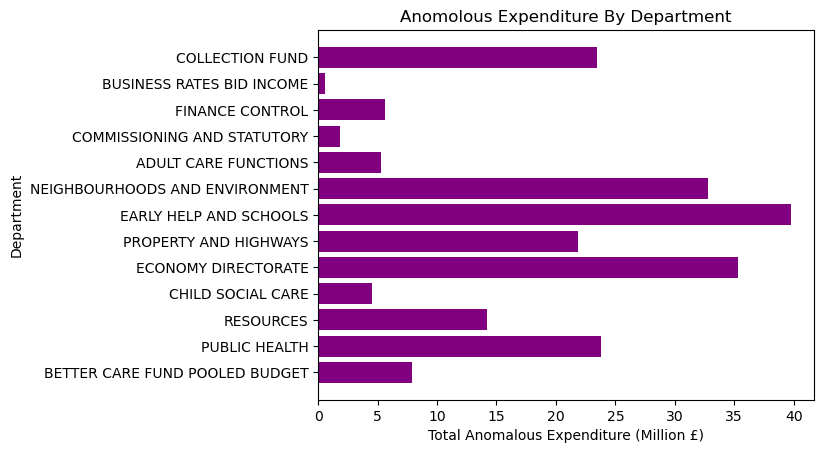

In [47]:
# Visualisation of Revenue By Department 

plt.barh(outlier_dept_spend['Department'], outlier_dept_spend['Anomalous Expenditure (Million £)'], color='purple')
plt.xlabel('Total Anomalous Expenditure (Million £)')
plt.ylabel('Department')
plt.title('Anomolous Expenditure By Department')
plt.show()

In [48]:
# Finding high proportions of anomalous expenditure

prop_anomalies = np.array(outlier_dept_spend['Percentage of Anomalous Transactions (%)'].tolist())
mean = (prop_anomalies.sum())/len(prop_anomalies)
outlier_prop_upper_threshold = mean + (1.2 * prop_anomalies.std())
outlier_prop_lower_threshold = mean - (1.2 * prop_anomalies.std())

print(f"The mean percent of anomalous transactions is: {mean:,.2f}\n"
      f"The upper threshold for outliers here is: {outlier_prop_upper_threshold:,.2f}\n"
      f"The lower threshold for outlier here is: {outlier_prop_lower_threshold:,.2f}\n"
      f"Lower bound is irrelevant becuase you cannot have a negative percentage in this case")

The mean percent of anomalous transactions is: 19.70
The upper threshold for outliers here is: 56.22
The lower threshold for outlier here is: -16.81
Lower bound is irrelevant becuase you cannot have a negative percentage in this case


In [49]:
high_prop = outlier_dept_spend[outlier_dept_spend['Percentage of Anomalous Transactions (%)'] >= outlier_prop_upper_threshold]
high_prop

,Department,Anomalous Expenditure (Million £),Number of Transactions,Mean Expenditure Per Transaction (Thousand £),Percentage of Anomalous Transactions (%)
0,BETTER CARE FUND POOLED BUDGET,7.86,24,327.500000,60.0
12,COLLECTION FUND,23.42,36,650.555556,100.0


### Findings

There are 1,329 transactions that can be considered anomalous. A caveat is that the mean and standard deviation were calculated across all transactions, rather than separately by department. As a result, some transactions may be flagged as anomalous even though they fall within 1.2 standard deviations of their department’s mean expenditure per transaction. However, this method is simpler and more efficient for scanning for outliers and provides a single, consistent standard for what is considered anomalous. Additionally, including the Percentage of Anomalous Transactions (%) column helps mitigate this limitation by identifying departments that have an unusually high proportion of outliers relative to their total number of transactions.

Departments that do not have any anomalous spending are Obsolete Services, Control Account and Finance indicating that all their transactions fall within 1.2 standard deviations from the mean. This suggests that these departments have predictable financial behaviour and low risk of irregularities.

Conversely, Better Care Fund Pooled Budget and Collection Fund are the opposite. These departments have an abnormally high proportion of anomalous transactions (60% and 100% respectively). Most departments have a low proportion ranging from 0-8%. On the other hand, because 100% of the Collection Fund’s transactions were considered anomalous it is likely that the reason proportion is so high is to do with the departments function within the council. As Better Care Fund Pooled Budget has been flagged for investigation multiple times prior and its appearance in this list, it is now a priority during the analysis stage. In addition to Better Care Fund Pooled Budget and Collection Fund, Business Rates BID Income and Finance Control exhibited a high proportion of anomalous transactions (55% and 20). However these departments have not previously been flagged, and will receive a shallow analysis to provide more context on its role so it is unnecessary to heavily scrutinise these departments.

Early Help and Schools (£39.73 million), Neighbourhoods and Environment (£32.75 million), Property and Highways (£21.84 million), Public Health (£23.80 million) and the Economy Directorate (£35.34 million) are the top 5 departments with largest anomalous expenditure. Each of these departments are below 5% for anomalous transactions indicating that only a few of their transactions are anomalous. This could be a result of the method of determining outliers, but the low percentage suggests that their department is not worth investigating. 

## Anomalous Dates

In this section I will be looking closer at the Transaction Date and Date Paid columns to identify wether there were any delays in payment or outstanding payments still present. This is important in determining wether the council is fulfilling its financial obligations and to held them accountable.  

In [50]:
# Creating a data frame of rows from big df where transaction date does not equal date paid 

delayed_payments = big_df.loc[big_df['Transaction Date'] != big_df['Date Paid']] 


if len(delayed_payments) == 0: 
    print(f"No delayed payments\n" 
          f"Every transaction was paid on the same day") 

No delayed payments
Every transaction was paid on the same day


### Findings

Each transaction is made and paid on the same day. There are no outstanding or delayed payments simplifying cash flow analysis, this also reduces the risk of misrepresenting when money left the councils account. Conversely, the ‘Transaction Date’ was initially named ‘Efefctive Date’. Assuming this was supposed to be ‘Effective Date’ this may not necessarily have been the date the transaction was made as previously thought, hence why each transaction date matches the date paid. Without discussing with the council directly it is difficult to determine the true purpose of this column and hence will continue to be analysed as ‘Transaction Date’ 

Overall having all transactions paid on the same day they are recorded reflects efficient financial management and strong internal controls. From a public perspective, this demonstrates that the council is promptly meeting its financial obligations, which enhances transparency, accountability, and trust in how public money is handled.

# Final Analyses 

## Better Care Fund Pooled Budget - Why So Anomalous?

### What Is It? 

Upon research Better Care Fund Pooled Budget is connected to the national Better Care Fund initiative in England that aims to encourage integration between health and social care. The money is pooled from local authorities like Rochdale borough council and clinical commissioning groups (Parts of the NHS) to be spent on joint priorities. The goals of this initiative are to reduce hospital admissions, support people’s independence at home and to improve care for adults and vulnerable people. The pooled budget therefore allows the council to combine its social care money with NHS contributions. This explains why this department has been flagged in department expenditure because the department covers a wide range of transactions that cover large care packages contracts and smaller operational costs resulting in the large mean transaction spend. Its appearance in department revenue is likely due to return of unused funds to be put back into the pool, or from an NHS contributions. Following on from this the higher proportion of anomalous transactions can likely be explained because it is given out in lump sums to support different functions.

### Implications

The Better Care Fund Pooled Budget will spend money on supporting care services contracts and programs that fall under this category. I hypothesise that large amounts will be paid to various care providers, community health initiatives and care packages for both adults and children. Furthermore, I hypothesise that the smaller transactions within this department will be spent on its admin costs (e.g stationary and printing) and its revenue will be from other branches of the council or NHS.

### Where does the money go? 

In [51]:
# Creating a Better Care Fund Pooled Budget df

better_care_df = big_df[big_df['Department']=='BETTER CARE FUND POOLED BUDGET'].sort_values('Transaction Date', ascending=True).copy()

# Finding the various unique suppliers and descriptions
num_of_descriptions = better_care_df['Description'].nunique() 
num_of_suppliers = better_care_df['Supplier Name'].nunique() 
unique_des = better_care_df['Description'].unique().tolist() 
unique_sup = better_care_df['Supplier Name'].unique().tolist()

print(f"There are a total of {num_of_descriptions} descriptions for the departments transactions\n"
      f"The unique descriptions are {unique_des}\n"
      f"There are a total of {num_of_suppliers} suppliers for the departments transactions\n"
      f"The unique suppliers are {unique_sup}")

There are a total of 3 descriptions for the departments transactions
The unique descriptions are ['INDEPENDENT UNITS', 'CONTRACTS', 'VOLUNTARY ASSOCIATIONS']
There are a total of 6 suppliers for the departments transactions
The unique suppliers are ['PENNINE CARE NHS', 'MILLBROOK HEALTHCARE LTD', 'NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST', 'N COMPASS', 'REDACTED - PERSONAL DATA', 'NHS GREATER MANCHESTER ICB']


In [52]:
# Spending per description 

contract_spend = better_care_df[better_care_df['Description'] == 'CONTRACTS']['Amount (£)'].sum() 
independent_unit_spend = better_care_df[better_care_df['Description'] == 'INDEPENDENT UNITS']['Amount (£)'].sum() 
voluntary_assoc_spend = better_care_df[better_care_df['Description'] == 'VOLUNTARY ASSOCIATIONS']['Amount (£)'].sum() 

# Number of transactions per description 
contract_trans = better_care_df[better_care_df['Description'] == 'CONTRACTS'].shape[0] 
ind_uni_trans = better_care_df[better_care_df['Description'] == 'INDEPENDENT UNITS'].shape[0]
vol_assoc_trans = better_care_df[better_care_df['Description'] == 'VOLUNTARY ASSOCIATIONS'].shape[0]

print(f"The total amount spent on {contract_trans} contracts is: £{contract_spend:,.2f} \n" 
      f"The total amount spent on {ind_uni_trans} independent units is: £{independent_unit_spend:,.2f}\n" 
      f"The total amount spend on {vol_assoc_trans } voluntary associations is: £{voluntary_assoc_spend:,.2f}")

The total amount spent on 38 contracts is: £7,957,141.94 
The total amount spent on 1 independent units is: £32,621.08
The total amount spend on 1 voluntary associations is: £148,131.04


In [53]:
daily_spend = better_care_df.groupby('Transaction Date')['Amount (£)'].sum()

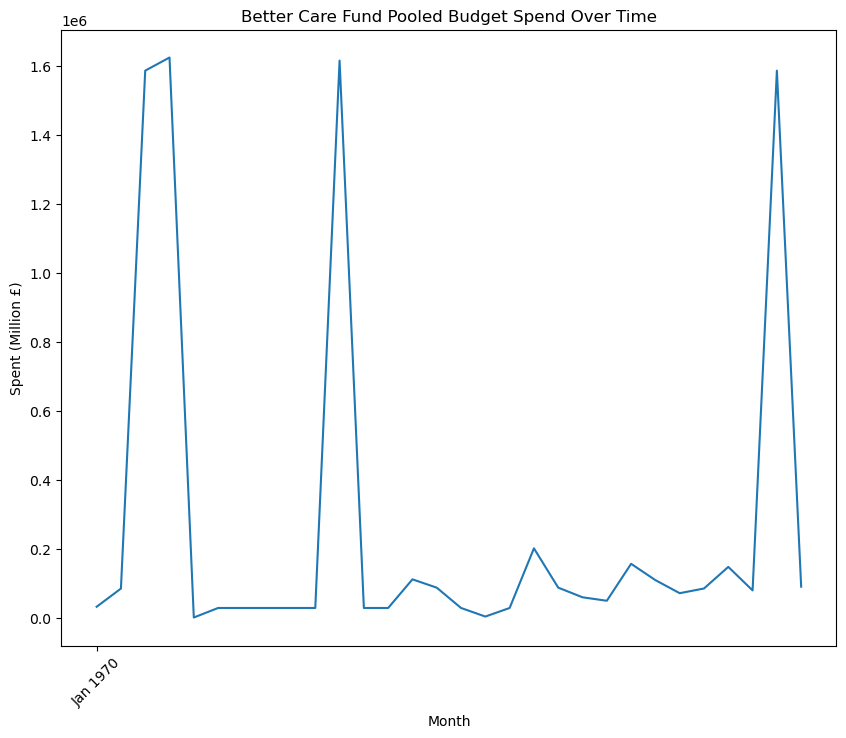

In [54]:
# Visualisation of the departments transactions over time 

plt.figure(figsize=(10, 8)) 

plt.plot(daily_spend.index, daily_spend.values, linestyle='-') 
plt.title('Better Care Fund Pooled Budget Spend Over Time')
plt.xlabel('Month') 
plt.ylabel('Spent (Million £)')
plt.xticks(rotation=45)

# Organise the months correctly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

In [55]:
# Find transactions over the value of 1,000,000 - find the transactions responsible for the peaks

spend_over_mill = better_care_df[better_care_df['Amount (£)'] > 1000000] 
spend_over_mill

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002272214,1,02/08/2024,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,02/08/2024,1585493.75,CONTRACTS
V002318741,1,12/11/2024,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,12/11/2024,1585493.75,CONTRACTS
V002268654,1,26/07/2024,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,26/07/2024,1585493.75,CONTRACTS


In [56]:
# Spending in february 

better_care_df['Transaction Date'] = pd.to_datetime(better_care_df['Transaction Date'], dayfirst=True)

feb_spending = better_care_df[better_care_df['Transaction Date'].dt.month == 2]
feb_spending

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002361102,1,2025-02-11,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,11/02/2025,414506.25,CONTRACTS
V002361104,1,2025-02-11,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,11/02/2025,414506.25,CONTRACTS
V002361270,1,2025-02-11,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,11/02/2025,414506.25,CONTRACTS
V002361273,1,2025-02-11,BETTER CARE FUND POOLED BUDGET,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,11/02/2025,380027.00,CONTRACTS
V002367936,1,2025-02-12,BETTER CARE FUND POOLED BUDGET,N COMPASS,12/02/2025,29105.83,CONTRACTS


### Findings

The graph clearly shows 3 peaks in spending across time. In combination with department spend per month table we can identify 4 months with abnormally large spending (July, August, November and February). According to the graph the spending in these months is approximately £1.6 million. We can look for transactions above 100000. This revealed 3 transactions of the same amount (£1,585,493.75) to the same supplier for contracts. Each of these transactions were paid in July, August and November. While this accounts for the large spend in July August and November it does not explain February’s peak. After filtering the better care fund pooled budget transactions for February, we can see that 5 large sum transactions totalling £1.65 million. 4 of these transactions were paid to an NHS branch and 1 of which was paid to 'N Compass'. Interestingly most of transactions that result in the peaks are paid to 1 supplier in particular, the northern care alliance NHS foundation trust with the description of contracts. 

The majority of spending by the Better Care Fund is spent on contracts (£7,957,141.94) is as hypothesised, payed to various care providers. 3/6 of the suppliers are NHS bodies also as hypothesised. 'Millbrook Healthcare LTD' provide various services such as community equipment services which install and maintain healthcare equipment, wheelchair services and an online store where you can order a wide range of therapeutic and assistive living aid. 'N Compass' are a company orientated around person centred support offering counselling and carer support. The remaining supplier is redacted in order to comply with data protection. 

Contradicting my hypothesis, this department does not complete any small transactions and strictly funds the suppliers discussed above. Consequently, this department will likely have small amount of staff that conduct the transactions and therefore operational costs are minimal. Presumably the operational costs it does require, if any, are taken from a different department within the council becuase there are no stationary costs within this department. 

[Millbrook Healthcare LTD](https://millbrookhealthcare.co.uk/) 

[N Compass](https://www.n-compass.org.uk/)    

## Top 5 Largest Transactions By Department

### Economy Directorate

In [57]:
economy_directorate = big_df[big_df['Department']=='ECONOMY DIRECTORATE'].sort_values('Amount (£)', ascending=False).head(5)
economy_directorate

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002401129,1,15/04/2025,ECONOMY DIRECTORATE,GMCA,15/04/2025,1654600.0,PASSENGER TRANSPORT LEVY
V002427177,1,13/06/2025,ECONOMY DIRECTORATE,REDACTED - PERSONAL DATA,13/06/2025,1654600.0,PASSENGER TRANSPORT LEVY
V002417020,1,15/05/2025,ECONOMY DIRECTORATE,GMCA,15/05/2025,1654600.0,PASSENGER TRANSPORT LEVY
V002326189,1,15/11/2024,ECONOMY DIRECTORATE,GMCA,15/11/2024,1607300.0,PASSENGER TRANSPORT LEVY
V002297342,1,13/09/2024,ECONOMY DIRECTORATE,GMCA,13/09/2024,1607300.0,PASSENGER TRANSPORT LEVY


#### Interpretation 

The largest transactions from the Economy Directorate are paid to a supplier named GMCA, with the description of passenger transport levy. A transport levy is a fee to support local transport (buses, trams and others), it is used to subsidise routes that would not be commercially viable. In combination these pieces of evidence indicate that the largest burden to the Economy Directorate is paying the Greater Manchester Combined Authority to fund public transport inside the borough. Once paid to the GMCA it will likely end up in the hands of Transport for Greater Manchester. Interestingly, one of the transactions is not to GMCA and is to an individual supplier, which has been redacted in order to comply with Data Protection. This means that it is owned by one individual that could be identified from this information alone. It does have the same description and a similar transaction to a private supplier that requires subsidising to operate the routes Rochdale Borough Council deem necessary.

### Child Social Care

In [58]:
child_soc_care = big_df[big_df['Department']=='CHILD SOCIAL CARE'].sort_values('Amount (£)', ascending=False).head(5)
child_soc_care

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002270547,1,30/07/2024,CHILD SOCIAL CARE,BURY MBC,30/07/2024,264879.89,PROFESSIONAL FEES
V002270546,1,30/07/2024,CHILD SOCIAL CARE,BURY MBC,30/07/2024,241446.43,PROFESSIONAL FEES
V002263086,1,23/07/2024,CHILD SOCIAL CARE,BOLTON MBC,23/07/2024,124971.24,FEES / COMMISSION
V002416278,1,27/06/2025,CHILD SOCIAL CARE,REDACTED - PERSONAL DATA,27/06/2025,82218.00,FEES / COMMISSION
V002423245,1,27/06/2025,CHILD SOCIAL CARE,REDACTED - PERSONAL DATA,27/06/2025,81726.00,ACTIVITIES


#### Interpretation 

The top 3 largest transactions here are paid to Bury MBC and Bolton MBC. These are neighbouring boroughs within Greater Manchester (see map). Therefore, it can be inferred that these transactions support a shared service or an outsourced service function related to social care. The remaining 2 suppliers are redacted to protect personal data. However, this is unsurprising as Child Social Care covers a variety of functions some of which are outsourced to private suppliers to help deliver the service. For example, a private supplier could be paid to provide children with activities, including occupational, social cultural and recreational activities (GOV.UK).

### Neighbourhoods and Environment 

In [59]:
neigh_environ = big_df[big_df['Department']=='NEIGHBOURHOODS AND ENVIRONMENT'].sort_values('Amount (£)', ascending=False).head(5)
neigh_environ

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002405614,1,23/04/2025,NEIGHBOURHOODS AND ENVIRONMENT,G M WASTE DISPOSAL AUTHORITY,23/04/2025,1378000.0,WASTE DISPOSAL LEVY
V002429798,1,23/06/2025,NEIGHBOURHOODS AND ENVIRONMENT,REDACTED - PERSONAL DATA,23/06/2025,1376000.0,WASTE DISPOSAL LEVY
V002417019,1,23/05/2025,NEIGHBOURHOODS AND ENVIRONMENT,G M WASTE DISPOSAL AUTHORITY,23/05/2025,1376000.0,WASTE DISPOSAL LEVY
V002340960,1,20/12/2024,NEIGHBOURHOODS AND ENVIRONMENT,G M WASTE DISPOSAL AUTHORITY,20/12/2024,1333000.0,WASTE DISPOSAL LEVY
V002354495,1,20/01/2025,NEIGHBOURHOODS AND ENVIRONMENT,G M WASTE DISPOSAL AUTHORITY,20/01/2025,1333000.0,WASTE DISPOSAL LEVY


#### Interpretation 

4 of the suppliers in the top 5 transactions for this department are GM Waste Disposal Authority. Upon research this is the Greater Manchester Waste Disposal Authority (GMWDA), a council body within Greater Manchester responsible which manages and disposes of household waste across the region including recycling, compost and creating energy from the waste. This is in line with the descriptions provided of ‘Waste disposal levy’. The remaining transaction has the same description however the supplier’s name is redacted. This is likely a local smaller waste disposal company that is hired to deal with waste that is beyond the capabilities of GMWDA. If this is not the case, it would be more cost efficient to use the same supplier to use the same function highlighting a potential area for improvement. 

### Adult Care Functions

In [60]:
adult_care = big_df[big_df['Department']=='ADULT CARE FUNCTIONS'].sort_values('Amount (£)', ascending=False).head(5)
adult_care

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002406370,1,24/04/2025,ADULT CARE FUNCTIONS,SPRINGHILL HOSPICE ROCHDALE,24/04/2025,303600.00,BCF - LOCAL AUTHORITY PAYMENT
V002275796,1,17/07/2024,ADULT CARE FUNCTIONS,POSSABILITIES CIC TRADING,17/07/2024,183796.39,DAY CARE
V002429731,1,11/06/2025,ADULT CARE FUNCTIONS,REDACTED - PERSONAL DATA,11/06/2025,166604.61,DAY CARE
V002415925,1,09/05/2025,ADULT CARE FUNCTIONS,POSSABILITIES CIC TRADING,09/05/2025,164227.16,DAY CARE
V002353946,1,21/01/2025,ADULT CARE FUNCTIONS,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,21/01/2025,163378.00,ACTIVITIES


#### Interpretation 

The largest transaction within this department is nearly double the value of the following 4. The description provided from this transaction is ‘BCF – Local authority payment’ and thus is connected to the national better care fund initiative previously discussed. The supplier linked to this transaction is the ‘Springhill Hospice Rochdale’. Hospices are specialised units that aim to improve the lives of those with incurable/terminal illnesses. This helps explain the transactions size as this is a worthwhile but extreme cost. It is curious that this transaction is linked to Adult Care Functions department rather the Better Care Fund Pooled Budget however. The following 3 transactions are for Day Care which is a crucial component of the social care system that provides an out of home environment to help individuals maintain their independence and provides caregivers with respite. The final transaction here is paid to an NHS body for ‘activities’ which is likely a similar service to activities within child social care.

### Resources

In [61]:
res = big_df[big_df['Department']=='RESOURCES'].sort_values('Amount (£)', ascending=False).head(5)
res

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002272721,1,05/08/2024,RESOURCES,ARTHUR J GALLAGHER INSURANCE BROKERS LTD SWINDON,05/08/2024,757895.32,TRANSACTIONS-EXPENDITURE
V002337368,1,24/12/2024,RESOURCES,GMCA,24/12/2024,688000.00,AGMA
V002272707,1,05/08/2024,RESOURCES,ARTHUR J GALLAGHER INSURANCE BROKERS LTD SWINDON,05/08/2024,639343.04,TRANSACTIONS-EXPENDITURE
V002401822,1,27/06/2025,RESOURCES,MANCHESTER CITY COUNCIL,27/06/2025,560000.00,CONTRACTS
V002440820,1,27/06/2025,RESOURCES,MHCLG,27/06/2025,469674.00,TRANSACTIONS-EXPENDITURE


#### Interpretation 

Transaction-expenditure appears three times as the description for the top 5 largest transactions within this department. This is a particularly ambiguous term, especially within an expenditure dataset. Two of the transactions are linked to the same supplier 'Arthur J Gallagher Insurance Brokers LTD Swindon'. The company was founded in Chicago in 1927. It now operates in 130 countries as predominantly an insurance brokerage and risk management company. This is an unsurprising expense within the Resources department as it is likely responsible for insuring various things within the council. It is somewhat reassuring that Rochdale Borough Council uses such a successful company to help handle their finances/insurance. The remaining supplier linked to transaction-expenditure is MHCLG, the Ministry of Housing, Communities and Local Government which is responsible for creating places to live and work addressing issues like housing and homelessness. The remaining 2 transactions are to the GMCA for ‘AGMA’ and Manchester City Council (The council for central Manchester, see map) and ‘Contracts’. This reflects Rochdale Borough Councils obligations to neighbouring and governing bodies within Greater Manchester. AGMA is the abbreviation for Association of Greater Manchester Authorities.

### Early Help and Schools

In [62]:
early_schools = big_df[big_df['Department']=='EARLY HELP AND SCHOOLS'].sort_values('Amount (£)', ascending=False).head(5)
early_schools

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002322603,1,31/10/2024,EARLY HELP AND SCHOOLS,AXIOM EDUCATION ROCHDALE LIMITED,31/10/2024,921937.09,PFI SCHEMES RPIX
V002375198,1,28/02/2025,EARLY HELP AND SCHOOLS,AXIOM EDUCATION ROCHDALE LIMITED,28/02/2025,916650.09,PFI SCHEMES RPIX
V002367254,1,11/02/2025,EARLY HELP AND SCHOOLS,AXIOM EDUCATION ROCHDALE LIMITED,11/02/2025,910113.36,PFI SCHEMES RPIX
V002408790,1,30/04/2025,EARLY HELP AND SCHOOLS,AXIOM EDUCATION ROCHDALE LIMITED,30/04/2025,906876.39,PFI SCHEMES RPIX
V002388943,1,31/03/2025,EARLY HELP AND SCHOOLS,AXIOM EDUCATION ROCHDALE LIMITED,31/03/2025,902992.02,PFI SCHEMES RPIX


#### Interpretation 

The top 5 largest transactions within this department are almost identical, with the same supplier, similar amounts and the same description ‘PFI Schemes RPIX’. The supplier ‘Axiom Education Rochdale Limited’ is a company that is registered within the UK since 2005; however, I could not find any additional information about this company online. The description stands for private finance initiative contracts adjusted for inflation using the retail price index (RPIX). This refers to a government procurement method where private sector companies built and maintained infrastructure such as schools over long contractual periods. From this information alone it is difficult to tell whether this is an active contract, however the PFI Schemes RPIX was replaced by PF2 for new contracts. Based on this it is likely an expired contract that Rochdale Borough Council is still paying off increasing the financial burden upon this department.

### Property and Highways

In [63]:
prop_high = big_df[big_df['Department']=='PROPERTY AND HIGHWAYS'].sort_values('Amount (£)', ascending=False).head(5)
prop_high

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002307307,1,15/10/2024,PROPERTY AND HIGHWAYS,EUROVIA INFRASTRUCTURE LTD,15/10/2024,571916.94,MINOR BUILDING WORKS
V002289649,1,19/08/2024,PROPERTY AND HIGHWAYS,JOHN SISK AND SON LTD,19/08/2024,548734.75,ROADWORKS
V002297458,1,06/09/2024,PROPERTY AND HIGHWAYS,COMMUNITY LIGHTING PARTNERSHIP ROCHDALE LTD,06/09/2024,465033.43,PFI SCHEMES RPIX
V002283520,1,31/07/2024,PROPERTY AND HIGHWAYS,COMMUNITY LIGHTING PARTNERSHIP ROCHDALE LTD,31/07/2024,457860.98,PFI SCHEMES RPIX
V002371743,1,07/02/2025,PROPERTY AND HIGHWAYS,COMMUNITY LIGHTING PARTNERSHIP ROCHDALE LTD,07/02/2025,456891.85,PFI SCHEMES RPIX


#### Interpretation 

The top 2 largest transactions within this department are described as ‘Minor building works’ and ‘Roadworks’. Given the department this is expected within due to Rochdale Councils area of responsibility. Both companies linked to these transactions support the descriptions provided. The remaining supplier is the ‘Community lighting partnership Rochdale LTD’ with the description PFI schemes RPIX. As previously discussed it is difficult to determine whether this is still an active contract, however it was likely in relation to constructing new street lights hence the supplier name.

### Public Health

In [64]:
pub_health = big_df[big_df['Department']=='PUBLIC HEALTH'].sort_values('Amount (£)', ascending=False).head(5)
pub_health

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002325846,1,02/12/2024,PUBLIC HEALTH,WONDE LTD,02/12/2024,600000.0,ACTIVITIES
V002401089,1,15/04/2025,PUBLIC HEALTH,OLDHAM COUNCIL,15/04/2025,559865.5,CONTRACTED SERVICES
V002270425,1,15/07/2024,PUBLIC HEALTH,OLDHAM COUNCIL,15/07/2024,550000.0,CONTRACTED SERVICES
V002309394,1,15/10/2024,PUBLIC HEALTH,OLDHAM COUNCIL,15/10/2024,550000.0,CONTRACTED SERVICES
V002354493,1,14/01/2025,PUBLIC HEALTH,OLDHAM COUNCIL,14/01/2025,550000.0,CONTRACTED SERVICES


#### Interpretation 

4 of the largest transactions within this department are paid to Oldham Council, a neighbouring borough with Greater Manchester. These transactions are of similar, if not the same amount for ‘contracted services’. This is likely for a service that is outsourced to Oldham council to help support Rochdale. The largest of the transactions is paid to ‘Wonde LTD’, however after googling numerous companies come up including a software company and a company focused on supporting the armed forces community. I cannot be sure that the company linked to this transaction is either one because a software company seems unlikely to have been paid by the Public Health department. The company focused on supporting armed forces community is based in east Anglia and thus reduces the likelihood of this being the correct company. 

### Commisionaing and Statutory 

In [65]:
comstat = big_df[big_df['Department']=='COMMISSIONING AND STATUTORY'].sort_values('Amount (£)', ascending=False).head(5)
comstat

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002419862,1,13/06/2025,COMMISSIONING AND STATUTORY,REDACTED - PERSONAL DATA,13/06/2025,276974.00,CONSULTANT FEES
V002325579,1,26/11/2024,COMMISSIONING AND STATUTORY,NORTHERN CARE ALLIANCE NHS FOUNDATION TRUST,26/11/2024,263000.00,EXPENSES - GENERAL
V002295589,1,29/08/2024,COMMISSIONING AND STATUTORY,STEPPING STONE PROJECTS,29/08/2024,153061.02,SP BLOCK PAYMENTS - EXTERNAL
V002422887,1,13/06/2025,COMMISSIONING AND STATUTORY,REDACTED - PERSONAL DATA,13/06/2025,115406.00,CONSULTANT FEES
V002275665,1,16/07/2024,COMMISSIONING AND STATUTORY,NHS GREATER MANCHESTER ICB,16/07/2024,100000.00,SERVICE LEVEL AGREEMENTS


#### Interpretation 

These transactions are not specific enough to provide an obvious reason for the transactions. After researching Commisioning and Statutory department. their role is to makes sure the council’s legally required services exist (adult and child social care), usually by planning, buying, and overseeing them rather than delivering them directly. Following this, these transactions now make sense, allowing consultation and payments to such suppliers. 

### Finance Control

In [66]:
fin_control = big_df[big_df['Department']=='FINANCE CONTROL'].sort_values('Amount (£)', ascending=False).head(5)
fin_control

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002395587,1,25/04/2025,FINANCE CONTROL,GMCA,25/04/2025,2325142.00,AGMA
V002341377,2,12/12/2024,FINANCE CONTROL,LLOYDS BANK PLC,12/12/2024,185883.17,TRANSACTIONS-EXPENDITURE
V002311440,3,04/10/2024,FINANCE CONTROL,LLOYDS BANK PLC,04/10/2024,172127.20,TRANSACTIONS-EXPENDITURE
V002381936,2,06/03/2025,FINANCE CONTROL,LLOYDS BANK PLC,06/03/2025,163572.94,TRANSACTIONS-EXPENDITURE
V002311440,1,04/10/2024,FINANCE CONTROL,LLOYDS BANK PLC,04/10/2024,159269.06,TRANSACTIONS-EXPENDITURE


#### Interpretation 

The largest transactions within this department are dominated by centralised non-discretionary financial movements rather than operational spedning. The most significant transaction is to the GMCA for 'association of Greater Manchester authorities' reflecting the councils obligation to the GMCA. The remianing transactiosn are to Lloyds Bank PLC for transactions-expenditure suggesting routine cash management activity. Overall these transactions indicate that Finance Control primarily handles large, system related financial settlements and transfers between authorities, rather than direct service delivery expenditure. 

### Obsolete Services

In [67]:
obs_serv = big_df[big_df['Department']=='OBSOLETE SERVICES'].sort_values('Amount (£)', ascending=False).head(5)
obs_serv

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002278520,10,22/07/2024,OBSOLETE SERVICES,DUNSTERS FARM LIMITED,22/07/2024,130.92,PROVISIONS
V002270348,1,12/07/2024,OBSOLETE SERVICES,ALLIANCE DISPOSABLES LIMITED,12/07/2024,119.40,CATERING - GENERAL
V002278753,9,22/07/2024,OBSOLETE SERVICES,DUNSTERS FARM LIMITED,22/07/2024,100.00,PROVISIONS
V002278518,2,22/07/2024,OBSOLETE SERVICES,TC MEATS LIMITED,22/07/2024,86.25,PROVISIONS
V002272273,2,04/07/2024,OBSOLETE SERVICES,ALLIANCE DISPOSABLES LIMITED,04/07/2024,82.50,CATERING - GENERAL


#### Interpretation

Obsolete Services primarily deal in very small operational transactions. All of the top transactions within this department are for provisions and catering with payments made to local suppliers like Dunsters Farm Limited and TC Meats Limited. This indicates that the department mainly incurs day to day consumable costs for the council. Overall, the low transaction values and routine descriptions indicate a department with minimal financial footprint, likely maintained only to manage remaining obligations rather than ongoing core services.

### Control Account

In [68]:
control_acc = big_df[big_df['Department']=='CONTROL ACCOUNT'].sort_values('Amount (£)', ascending=False).head(5)
control_acc

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002328063,1,06/12/2024,CONTROL ACCOUNT,WHISTL UK LTD,06/12/2024,1807.39,TRANSACTIONS-EXPENDITURE
V002290616,1,13/09/2024,CONTROL ACCOUNT,WHISTL UK LTD,13/09/2024,1388.50,TRANSACTIONS-EXPENDITURE
V002285862,1,05/09/2024,CONTROL ACCOUNT,WHISTL UK LTD,05/09/2024,1324.98,TRANSACTIONS-EXPENDITURE
V002338302,1,20/12/2024,CONTROL ACCOUNT,WHISTL UK LTD,20/12/2024,1315.28,TRANSACTIONS-EXPENDITURE
V002337321,1,13/12/2024,CONTROL ACCOUNT,WHISTL UK LTD,13/12/2024,1315.15,TRANSACTIONS-EXPENDITURE


#### Interpretation 

The Control Account department make consitent moderate to low value transactions to a single suppliers (Whistl UK LTD) for Transactions-Expenditure. Whistl UK are a psotal and logistics supplier sugegsting these transactions are for related to bulk mail services within the council. They are likely resposnible for delivering council letters, bills, statutory notices, or other large-scale communications. The regularity and similarity between these transaactions suggest routine system-driven costs. Overall, this indicates that the Control Account functions as a clearing or intermediary department, used to process centrally managed operational expenses rather than direct departmental service spending     

### Business Rates Bid Incomce

In [69]:
bus_rates = big_df[big_df['Department']=='BUSINESS RATES BID INCOME'].sort_values('Amount (£)', ascending=False).head(5)
bus_rates

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002273166,1,11/07/2024,BUSINESS RATES BID INCOME,ROCHDALE TOWN CENTRE MANAGEMENT LTD,11/07/2024,127806.00,TRANSACTIONS-EXPENDITURE
V002431802,1,12/06/2025,BUSINESS RATES BID INCOME,REDACTED - PERSONAL DATA,12/06/2025,100000.00,TRANSACTIONS-EXPENDITURE
V002427018,1,24/06/2025,BUSINESS RATES BID INCOME,REDACTED - PERSONAL DATA,24/06/2025,98638.76,TRANSACTIONS-EXPENDITURE
V002285889,1,12/08/2024,BUSINESS RATES BID INCOME,STAKEHILL BID LTD,12/08/2024,93837.52,TRANSACTIONS-EXPENDITURE
V002340929,1,21/01/2025,BUSINESS RATES BID INCOME,ROCHDALE TOWN CENTRE MANAGEMENT LTD,21/01/2025,85000.00,TRANSACTIONS-EXPENDITURE


#### Interpreation 

The largest transactions within this department are high value transfers to Business Improvement Bodies, reflecting the councils role in colelcting and redistributing rather than generating discretionary spend. Payments to organisations like Rochdale Town Centre Management LTD and Stakehill BID LTD are likely a scheduled release of funds collected from locacl businesses to fund town-centre and business area improvements. The presence of large rounded sums and repeat payments suggests planned, contractual distributions, while the redacted entries are consistent with BID-related levy settlements. Overall, this department acts primarily as a pass-through account, managing significant cash flows tied to statutory business rate mechanisms rather than operational service delivery.

### Collection Fund

In [70]:
col_fund = big_df[big_df['Department']=='COLLECTION FUND'].sort_values('Amount (£)', ascending=False).head(5)
col_fund

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002405178,1,22/04/2025,COLLECTION FUND,GMCA,22/04/2025,1370060.0,TRANSACTIONS-EXPENDITURE
V002429802,1,20/06/2025,COLLECTION FUND,REDACTED - PERSONAL DATA,20/06/2025,1370058.0,TRANSACTIONS-EXPENDITURE
V002415345,1,20/05/2025,COLLECTION FUND,GMCA,20/05/2025,1370058.0,TRANSACTIONS-EXPENDITURE
V002273051,1,22/07/2024,COLLECTION FUND,GMCA,22/07/2024,1274213.0,TRANSACTIONS-EXPENDITURE
V002340963,1,20/12/2024,COLLECTION FUND,GMCA,20/12/2024,1274213.0,TRANSACTIONS-EXPENDITURE


#### Interpretation 

These very large seemingly regular payments to predominantly the GMCA reflect the councils obligation to pass on funds it has collected rather than spending them on services within the borough. Essentially this department manages, redistributes and collected funds accoridng to legal requirments. 

### Finance

In [71]:
fin = big_df[big_df['Department']=='FINANCE'].sort_values('Amount (£)', ascending=False).head(5)
fin

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002393398,1,20/03/2025,FINANCE,HOLLAND AND BARRETT,20/03/2025,15000.00,CAPITAL COST
V002350292,1,17/01/2025,FINANCE,WHISTL UK LTD,17/01/2025,3163.87,TRANSACTIONS-EXPENDITURE
V002311537,1,08/10/2024,FINANCE,WHISTL UK LTD,08/10/2024,2892.82,TRANSACTIONS-EXPENDITURE
V002416568,1,16/05/2025,FINANCE,WHISTL UK LTD,16/05/2025,2570.21,TRANSACTIONS-EXPENDITURE
V002408745,1,19/05/2025,FINANCE,WHISTL UK LTD,19/05/2025,2454.73,TRANSACTIONS-EXPENDITURE


#### Interpretation 

The largest transactions within the Finace department include one signficant payment to Holland and Barrett and Whistl UK LTD previosuly discussed. This suggests the department handles a mix of occasional large transactions and regular operation expenses like mail and administrative services. Overall, the spending reflects both planned capital costs and everyday financial operations.

### Findings

## Department Expenditure Over Time

In [72]:
# Creaate a month df list to loop through
month_dfs = [july_df, august_df, september_df, oct_df, nov_df, dec_df, jan_df, feb_df, mar_df, apr_df, may_df, jun_df] 

# check that this code works for calcualting each department spend - should be 16 for the 16 departments 
department_month_totals = [july_df[july_df['Department'] == dept]['Amount (£)'].sum() for dept in departments]
print(len(department_month_totals))

16


In [73]:
# Function to store and return the values

def dept_spend(month_dfs, departments):
    department_spend = []
    
    for df in month_dfs:
        department_month_totals = [df[df['Department'] == dept]['Amount (£)'].sum() / 1e6 for dept in departments]
        department_spend.append(department_month_totals)
    return department_spend

department_spend = dept_spend(month_dfs, departments)
# print(department_spend)

# Check, we should have 12 fulls
not_full = 0
full = 0

for i in range(len(department_spend)): 
    if len(department_spend[i]) != 16:
        not_full = not_full + 1 
    if len(department_spend[i]) == 16:
        full = full + 1 

print(f"Full:{full}\n" 
      f"Not Full:{not_full}")

Full:12
Not Full:0


In [74]:
dept_spend_per_month = pd.DataFrame({'Department' : departments, 
                                     'Jul' : department_spend[0],
                                     'Aug': department_spend[1], 
                                     'Sep': department_spend[2], 
                                     'Oct': department_spend[3], 
                                     'Nov': department_spend[4], 
                                     'Dec': department_spend[5], 
                                     'Jan': department_spend[6], 
                                     'Feb': department_spend[7], 
                                     'Mar': department_spend[8], 
                                     'Apr': department_spend[9], 
                                     'May': department_spend[10], 
                                     'Jun': department_spend[11]})

dept_spend_per_month = dept_spend_per_month.set_index('Department')

In [75]:
# Mean and Std were done after the df was created so just gonna create a copy to avoid changing the figure

with_mean_std = dept_spend_per_month.copy() 
with_mean_std['Mean'] = with_mean_std.mean(axis=1) 
with_mean_std['Standard Deviation'] = with_mean_std.std(axis=1)
with_mean_std = with_mean_std.sort_values('Mean', ascending=False)
with_mean_std

,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Mean,Standard Deviation
Department,,,,,,,,,,,,,,
ECONOMY DIRECTORATE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BETTER CARE FUND POOLED BUDGET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RESOURCES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EARLY HELP AND SCHOOLS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEIGHBOURHOODS AND ENVIRONMENT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADULT CARE FUNCTIONS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PROPERTY AND HIGHWAYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PUBLIC HEALTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COMMISSIONING AND STATUTORY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


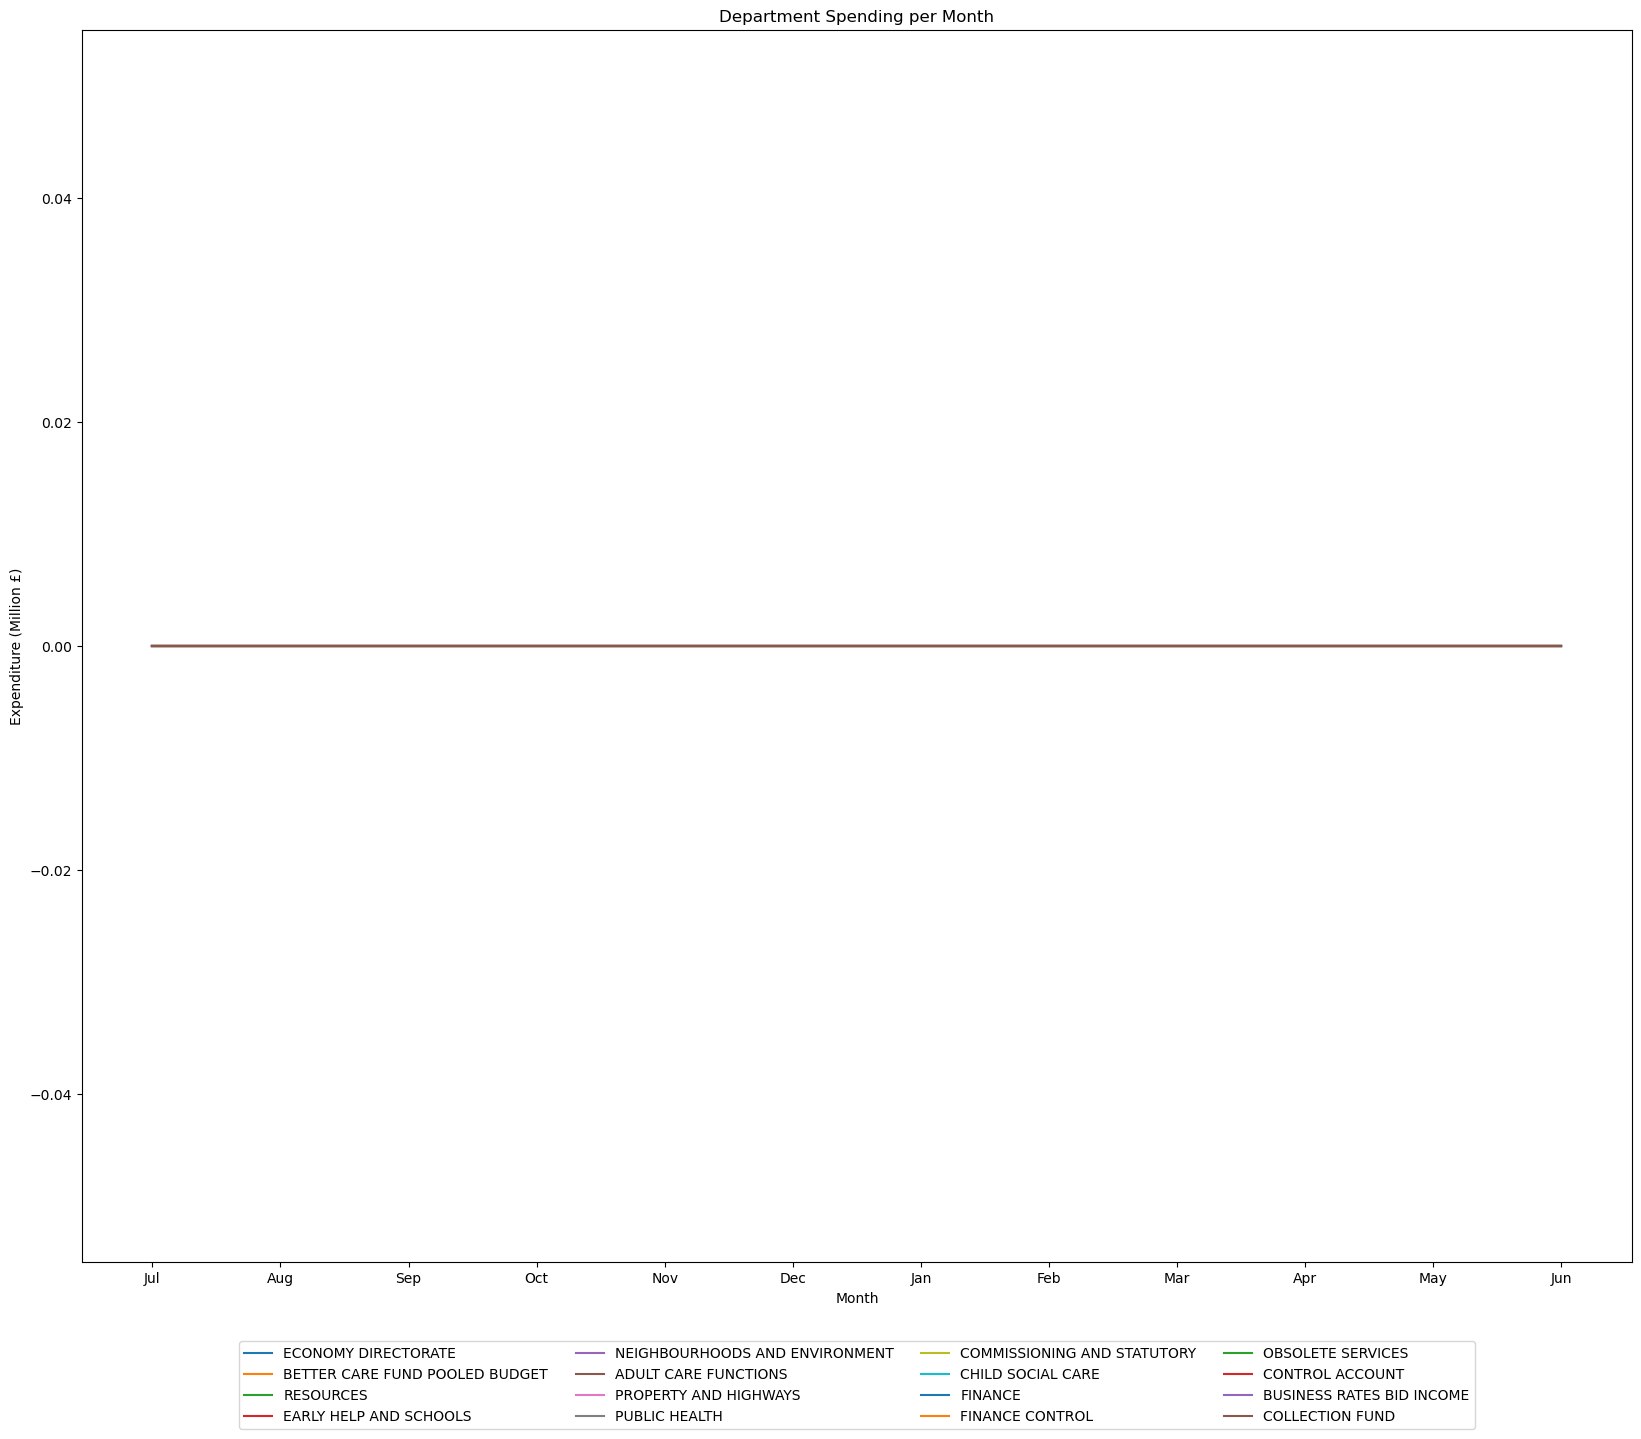

In [76]:
# Line graph with a series for each department 

plt.figure(figsize=(20, 16))

for dept in dept_spend_per_month.index: 
    plt.plot(dept_spend_per_month.columns, dept_spend_per_month.loc[dept], label=dept) 
    
plt.xlabel('Month')
plt.ylabel('Expenditure (Million £)')
plt.title('Department Spending per Month')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.show()

### Findings

The key insights from this graph show that Adult Care functions are the most significant department when it comes to expenditure, followed by Early Help Schools. From the table we can see their means (£11.164516 and £7.393645 million respectively) are significantly greater than the nearest department (Neighbourhoods and Environment £3.975410 million). This supports previous findings in expenditure by department. Interestingly these three departments experience the greatest variation in spending (£1.42, £1.46 and £1.11 million). Adult Care Functions department has 3 key peaks, one in each of November, January and May. The May and November peaks could align with new budget allocations or policy changes however evidence to support this could not be found online. Neighbourhoods and Environment (Green line starting around £7 million) begin with large spending in July before falling to below £4 million for the remaining 11 months. This could indicate a seasonal trend in which the department begins projects in the summer for them to take effect during the winter months. Similarly Early Help and Schools have its largest spend in October, this is likely due to beginning of the new academic year. The departments with the lowest expenditure and lowest variation in spending (Finance, Control Account and Obsolete Services) representing small financial activity with a combined total of 218 transactions (See Department expenditure table). After analysing their top 5 transactions the reason for this is because they do not provide a service but act more as administrative departments redistributing funds and day to day operational expenses. 

An interesting deviation in trend can be see in the resources department (Purple line starting at 1.2 million). The departments average spend is £1.631550 million, however two large peaks can be seen in August and June (£3.166804 and £3.404344 million respectively). Given that 4 of the top 5 largest transactions were in either August or June it can be assumed that the large transactions are responsible for these increases. Additionally, the better care fund pooled budget (Yellow starting around £2 million) displays quarterly peaks every 3 months (apart from July and May which don’t fit this pattern) reflecting a planned release of funds or contractual payments.

In an ideal world we would want department expenditure over time to be a flat line like that of collection fund (purple flat line around £2 Million). A flat line would indicate consistent predictable spending that is not affected by unexpected costs. Naturally, this is impossible for a council to achieve, instead an optimal department expenditure would be a smooth line with predictable peaks and troughs that makes it easy to budget for, minimise the cash strain and align with service requirements. On the other hand, a highly erratic line would indicate inefficiency and make the budget hard to manage. This would suggest things like uncoordinated spending or poor planning. Overall looking at the graph, particularly below £6 million, we can see generally smooth lines with a degree of variation.

## Stationary Expenditure

In [77]:
stat_expense = big_df.loc[big_df['Description']== 'STATIONERY']['Amount (£)'].sum()
stat_prin = (big_df.loc[big_df['Description']== 'STATIONERY']['Amount (£)'].sum()) + (big_df.loc[big_df['Description']== 'PRINTING & STATIONERY']['Amount (£)'].sum())

print(f"The total amount spent on stationary alone is...\n"
      f"£{stat_expense:,.2f}\n"
      f"When printing is also included ...\n" 
      f"£{stat_prin:,.2f}")

The total amount spent on stationary alone is...
£5,855.62
When printing is also included ...
£329,352.90


In [78]:
# Creating a Stationary and Printing df

# I am going to include stationary and printing here by replacing stationary and printing with stationery
big_df['Description'] = big_df['Description'].replace('PRINTING & STATIONERY', 'STATIONERY')

stat_spending = big_df[big_df['Description']== 'STATIONERY'].copy()
# stat_spending.head()

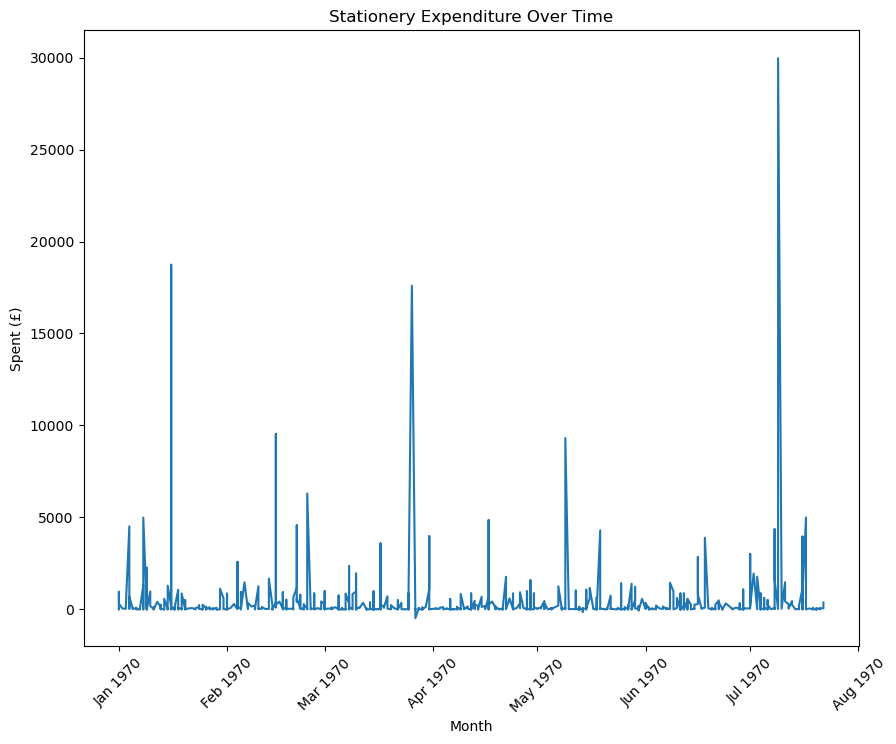

In [79]:
plt.figure(figsize=(10, 8)) 

plt.plot(stat_spending['Transaction Date'], stat_spending['Amount (£)'], linestyle='-') 
plt.title('Stationery Expenditure Over Time')
plt.xlabel('Month') 
plt.ylabel('Spent (£)')
plt.xticks(rotation=45)

# Organise the months correctly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

In [80]:
# July Peak 
stat_spending['Transaction Date'] = pd.to_datetime(stat_spending['Transaction Date'], dayfirst=True)

july_spending = stat_spending[stat_spending['Transaction Date'].dt.month == 7]

mean = july_spending['Amount (£)'].mean()
std = july_spending['Amount (£)'].std()

# outliers 
outlier_stat_spend_upper_threshold = mean + (1.2 * std)
outlier_stat_spend_lower_threshold = mean - (1.2 * std)
print(f"Upper threshold for outliers: £{outlier_stat_spend_upper_threshold:,.2f}\n" 
      f"Lower threshold for outliers: £{outlier_stat_spend_lower_threshold:,.2f}\n"
      f"Lower threshold can be ignored")

Upper threshold for outliers: £3,682.35
Lower threshold for outliers: £-2,759.36
Lower threshold can be ignored


In [81]:
# Filtering based on the threshold calculated 

high_stat_spend_A = july_spending[july_spending['Amount (£)'] >= outlier_stat_spend_upper_threshold]
# high_stat_spend_A

In [82]:
# October Peak 

oct_spending = stat_spending[(stat_spending['Transaction Date'].dt.month == 10)]
mean = oct_spending['Amount (£)'].mean() 
std = oct_spending['Amount (£)'].std() 

# outliers 
outlier_stat_spend_upper_threshold = mean + (1.2 * std)
outlier_stat_spend_lower_threshold = mean - (1.2 * std)
print(f"Upper threshold for outliers: £{outlier_stat_spend_upper_threshold:,.2f}\n" 
      f"Lower threshild for outliers: £{outlier_stat_spend_lower_threshold:,.2f}\n"
      f"Lower threshold can be ignored")

Upper threshold for outliers: £1,376.13
Lower threshild for outliers: £-892.92
Lower threshold can be ignored


In [83]:
# Filtering based on the threshold calculated 

high_stat_spend_B = oct_spending[oct_spending['Amount (£)'] >= outlier_stat_spend_upper_threshold]
# high_stat_spend_B

In [84]:
# June Peak 

jun_spending = stat_spending[(stat_spending['Transaction Date'].dt.month == 6)]
mean = jun_spending['Amount (£)'].mean() 
std = jun_spending['Amount (£)'].std() 

# outliers 
outlier_stat_spend_upper_threshold = mean + (1.2 * std)
outlier_stat_spend_lower_threshold = mean - (1.2 * std)
print(f"Upper threshold for outliers: £{outlier_stat_spend_upper_threshold:,.2f}\n" 
      f"Lower threshild for outliers: £{outlier_stat_spend_lower_threshold:,.2f}\n"
      f"Lower threshold can be ignored")

Upper threshold for outliers: £2,182.54
Lower threshild for outliers: £-1,651.71
Lower threshold can be ignored


In [85]:
# Filtering based on the threshold calculated 

high_stat_spend_C = jun_spending[jun_spending['Amount (£)'] >= outlier_stat_spend_upper_threshold]
# high_stat_spend_C

In [86]:
# Joining them together to see which transactionsa are responsible for the peaks

high_stat_spendig_list = [high_stat_spend_A, high_stat_spend_B, high_stat_spend_C]
high_stat_spending = pd.concat(high_stat_spendig_list)
high_stat_spending = high_stat_spending.sort_values('Amount (£)', ascending=False) 

# Filtering the filtered DFs to get the 5 transactions related to the 5 peaks - rather than including all transactions in each of the months 
high_stat_spending.head(5)

,,Transaction Date,Department,Supplier Name,Date Paid,Amount (£),Description
Transaction No.,Copy No.,,,,,,
V002270330,1,2024-07-29,RESOURCES,ROYAL MAIL GROUP LTD,29/07/2024,29964.90,STATIONERY
V002269694,1,2024-07-03,RESOURCES,BOTTOMLEYS PRINT SERVICES LTD,03/07/2024,18737.96,STATIONERY
V002401884,1,2025-06-13,RESOURCES,CRITIQOM LIMITED,13/06/2025,17595.02,STATIONERY
V002269693,1,2024-07-03,RESOURCES,BOTTOMLEYS PRINT SERVICES LTD,03/07/2024,13639.44,STATIONERY
V002311460,1,2024-10-07,RESOURCES,BOTTOMLEYS PRINT SERVICES LTD,07/10/2024,9542.82,STATIONERY


### Findings

Total expenditure on stationary alone was £5855.62, when printing was included, total expenditure increased to £329,352.90. When expenditure was plotted over time it appears with 5 peaks. Three of which in July and one in June and October indicating these were the transactions causing the observed 5 peaks observed in the Stationary Expenditure over time graph. Although there is nothing suspicious about these transactions itself, the timing and size of these payments suggest an element of inefficiency in the department’s purchasing approach. For example, making large lump-sum payments ranging between £9,000 and £30,000, rather than spreading purchases more evenly across the year, could indicate suboptimal cash flow management or planning. This purchasing approach likely increases the risk of stock piling or temporary shortages outside of these peaks’ periods. A more staggered procurement strategy could help smooth out stationary expenditure, improve budget predictability and potential improve supplier negotiations/discounts. While the spikes could indicate lumpy spending, there are plausible operational reasons tied to budget cycles, school terms, events, or procurement practices rather than mismanagement.

# Conclusion 

## So What?

### Key Findings 

This project analysed Rochdale Borough Council’s stationery expenditure as a case study to evaluate spending efficiency, consistency, and transparency. Across 256,804 transactions involving 2,800 suppliers, the council spent a total of £465.1 million. Expenditure over time was highly consistent, with an average monthly spend of £38.8 million, exactly one-twelfth of the annual total. This indicates well-controlled budgeting and effective financial planning overall.

Spending was concentrated across a small number of departments, with Adult Social Care, Early Help and Schools, Neighbourhoods and Environment, Economy Directorate, and Children’s Social Care accounting for the highest expenditure. This aligns with Rochdale’s socio-economic profile and demand for public services. The Better Care Fund Pooled Budget emerged as an outlier, showing unusually high average spend per transaction and generating notable revenue through large NHS transfers.

Outlier analysis identified 1,329 anomalous transactions, with the Better Care Fund Pooled Budget responsible for a disproportionately high share due to its role in receiving and distributing large NHS payments. Further investigation confirmed that these transactions were consistent with the department’s purpose rather than inefficiency.

Departmental spending over time revealed some seasonal and cyclical patterns, such as peaks in Adult Care Functions and Early Help and Schools that likely relate to policy cycles or the academic year, while the Better Care Fund showed quarterly payment peaks.

Focusing specifically on printing and stationery, total spend amounted to £329,352.90. While overall stationery spending was stable throughout the year, several sharp peaks were traced to large single transactions within the Resources department, suggesting potential inefficiencies linked to bulk purchasing. Aside from these peaks, stationery expenditure was generally consistent and predictable.


### Interpretation

Rochdale Borough Council handles its finances with a high degree of consistency and control, with the greatest share of expenditure being used to support frontline services aligned with its local needs. Although several departments displayed anomalous activity, upon further investigation most deviations were structural. For example, the Better Care Fund Pooled Budget operate in a structured manner rather than with a high degree of inefficiency. Therefore, the councils spending is broadly predictable consistent and in line with its responsibilities. On the other hand, isolated peaks in stationary procurement highlight where transparency could be improved and where further context about the council would help distinguish between inefficient peaks and operational necessity. Overall, Rochdale Borough Councils spending is largely well managed with only a few areas warranting deeper scrutiny to ensure efficiency when spending public funds.

### Recommendations Going Forward

#### 1. Transparency Improvements 

Increase the specificity of transaction descriptions.

A consistent issue throughout the project especially when reviewing the top five largest transactions per department was the prevalence of vague, incomplete, or overly broad transaction descriptions. This limited the ability to understand what goods or services were being purchased and made it difficult to distinguish between routine spending, one-off payments, or potential anomalies.

Why this matters:
- Improves public accountability by allowing residents and auditors to understand exactly how funds are being used.
- Supports detection of inefficiencies or unusual patterns by making spending categories clearer.
- Enhances consistency in financial reporting because clearer descriptions reduce ambiguity, making comparisons across departments more reliable.

Recommendation: Instead of having one column with ‘purpose’ the council should include two columns to encompass this attribute. I would suggest first having a category column that appropriately categorises transactions, followed by a purpose/description. This would drastically reduce issues/strange transactions being identified. 


#### 2. Supplier Consolidation for Efficiency and Consistency

The analysis of the largest transactions per department identified instances where multiple suppliers were delivering the same or highly similar goods/services, particularly in stationery and printing. This indicates a potential loss of economies of scale, inconsistent procurement practices, and possible duplication.

Benefits of reducing suppliers:
- Efficiency: Bulk purchasing from fewer suppliers typically reduces unit costs and strengthens negotiating power.
- Consistency: Standardising supplier relationships leads to predictable pricing and stable procurement channels across departments.
- Transparency: Fewer suppliers make spending patterns easier to track, reducing noise in financial monitoring.

Recommendation: The council should review supplier diversity within each transaction ‘category’ and create framework agreements or approved supplier lists that departments must use unless an exemption is justified.

#### 3. Standardise Bulk Purchasing 

Stationery spending showed stability overall but contained several large peaks driven by the Resources department. These could represent either legitimate bulk procurement or poorly timed high-value purchases.

Improving this would:
- Increase efficiency by smoothing purchasing cycles and avoiding sudden large transactions.
- Improve consistency because planned procurement reduces unexpected fluctuations.
- Strengthen transparency by allowing clearer interpretation of seasonal vs. irregular spikes.

Recommendation: Implement a council-wide procurement calendar for stationery and printing, including scheduled bulk orders and stock-level triggers. This would enable the council to trigger bulk buys when certain peak periods occur 